---
---

<center>

##### &nbsp;

# **IBM - Machine Learning Professional Certificate**


## **Unsupervised Machine Learning**


### **Analysis of Cancer Mortality Ratios by Cancer Type Across Different Countries**

### **JingZeng Xie**

</center>

<br/>
<br/>

---
---

# **TABLE OF CONTENTS**

<big>[**1. INTRODUCTION**](#1)</big>

- [**1.1 - Introduction**](#1.1)
- [**1.2 - Objective**](#1.2)
- [**1.3 - Coding Environment**](#1.3)

<big>[**2. DATA PROCESSING**](#2)

- [**2.1 - Data Collection**](#2.1)
- [**2.2 - Data Description**](#2.2)
- [**2.3 - Quality Assessment**](#2.3)
  - [2.3.1 - Normal Distribution](#2.3.1)
  - [2.3.2 - Missing Value](#2.3.2)
  - [2.3.3 - Invalid Value](#2.3.3)
  - [2.3.4 - Duplicate Value](#2.3.4)
  - [2.3.5 - Outlier Value](#2.3.5)
- [**2.4 - Data Preprocessing**](#2.4)
  - [2.4.1 - Data Cleaning](#2.4.1)
  - [2.4.2 - Missing Value Handling](#2.4.2)
  - [2.4.3 - Duplicate Handling](#2.4.3)
  - [2.4.4 - Outlier Handling](#2.4.4)
  - [2.4.5 - Centering and Scaling](#2.4.5)
  - [2.4.6 - Data Transformation](#2.4.6)
  - [2.4.7 - Correlation Coefficient](#2.4.7)
  - [2.4.8 - Data Encoding](#2.4.8)
- [**2.5 - Exploratory Data Analysis**](#2.5)
  - [2.5.1 - Data Visualization Analysis](#2.5.1)
  - [2.5.2 - Hypothesis Testing](2.5.2)

<big>[**3. MODELING**](#3)</big>

- [**3.1 - Evaluation Metric**](#3.1)
- [**3.2 - Centroid-Based Clustering**](#3.2)
  - [3.2.1 - K-Means](#3.2.1)
- [**3.3 - Hierarchical Clustering**](#3.3)
  - [3.3.1 - Agglomerative](#3.3.1)
  - [3.3.2 - Divisive](#3.3.2)
- [**3.4 - Distribution-Based Clustering**](#3.4)
  - [3.4.1 - Gaussian Mixture](#3.4.1)
- [**3.5 - Density-Based Clustering**](#3.5)
  - [3.5.1 - DBSCAN](#3.5.1)

<big>[**4. SUMMARY**](#4)</big>

- [**4.1 - Models Evaluation**](#4.1)
- [**4.2 - Summary**](#4.2)

<big>[**5. REFERENCES**](#5)</big>


---
---

# **1. INTRODUCTION** <span id="1"></span>

---
---

## **1.1 - Introduction** <span id="1.1"></span>



This project focuses on analyzing cancer prevalence by cancer type across different countries from 1990 to 2019. We will utilize unsupervised model with various clustering algorithms that are commonly used to segment information, and after evaluating and comparing these clustering algorithms, our goal is to determine the clustering algorithm that is best suited for our project's unsupervised model.

<br/>

A comprehensive exploration of the dataset will be conducted to assess its quality. To enhance the statistical significance and stability of our unsupervised model model, we will employ a range of standard data processing techniques to clean and optimize the dataset. Once the data has been refined, we will perform visual analyses to further evaluate its statistical properties.

<br/>

After preparing the dataset for modeling, we will implement an unsupervised learning approach using several clustering algorithms, including **K-Means**, **Agglomerative Clustering**, **Bisecting K-Means**, **Gaussian Mixture Model**, and **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**. To evaluate the performance of these algorithms, we will use the davies bouldin, silhouette score and calinski harabasz metrics.

---

## **1.2 - Objective** <span id="1.2"></span>



- **Main Objective**: This analysis aims to clarify whether the focus will be on clustering or dimensionality reduction.

- **Dataset Overview**: The study utilizes a dataset that includes the cancer prevalence by cancer type across different countries from 1990 to 2019, summarizing its key attributes and relevance.

- **Data Exploration and Preparation**: A brief overview of the data exploration process is provided, detailing the actions taken for data cleaning and feature engineering to enhance the dataset's quality and applicability.

- **Model Training and Comparison**: We summarize the training of the unsupervised model using various clustering techniques, examining their differences in cohesion and separation.

- **Final Clustering Evaluation**: By employing the silhouette coefficient, we identify the clustering algorithm that best fits the unsupervised model, evaluating both cohesion and separation.

- **Key Findings and Insights**: A summary of the key findings and insights is presented, highlighting the main drivers of the final model and the valuable insights derived from the dataset through the clustering analysis.

---

## **1.3 - Coding Environment** <span id="1.3"></span>



The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.

In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, TimeSeriesSplit, KFold, StratifiedKFold, GroupKFold, GridSearchCV
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering, BisectingKMeans, DBSCAN
from sklearn.mixture import GaussianMixture

import scipy
import math
import random

import plotly.express as px
import json

---
---

# **2. DATA PROCESSING** <span id="2"></span>

---
---

## **2.1 - Data Collection** <span id="2.1"></span>




The dataset ([Cancer and Deaths Dataset : 1990 to 2019 Globally](https://www.kaggle.com/datasets/belayethossainds/cancer-and-deaths-dataset-19902019-globally/data)) provides data on prevalence of people from various countries around the world collected between 1990 and 2019. It contains various types of cancer, which are essential for studying cancer treatment deficiencies in various countries and prevention of special types of cancer. With more than 30 years of statistics, this dataset is a perfect starting point for building machine learning models, analyzing cancer trends, and even developing projects related to cancer prevention.

<br/>

Each row represents the prevalence of various cancers in a country in that year, including important characteristics of liver, kidney, larynx, breast, thyroid, bladder, uterine and other organ cancers. The data is based on age-standardized prevalence of different cancers in the population of both sexes.

<br/>

The dataset can be used for:
- Building cancer prediction models
- Exploring cancer patterns
- Studying the prevalence relationship between various countries
- Improving forecast prevalence using machine learning models


In [ ]:
# Loading the dataset from local drive
data = pd.read_csv("/content/share-of-population-with-cancer-types.csv")

print(data)

          Country Code  ...  Gallbladder and biliary tract  Neoplasms
0     Afghanistan  AFG  ...                            0.0   0.476867
1     Afghanistan  AFG  ...                            0.0   0.476258
2     Afghanistan  AFG  ...                            0.0   0.475649
3     Afghanistan  AFG  ...                            0.0   0.475640
4     Afghanistan  AFG  ...                            0.0   0.480281
...           ...  ...  ...                            ...        ...
7699     Zimbabwe  ZWE  ...                            0.0   0.566873
7700     Zimbabwe  ZWE  ...                            0.0   0.567007
7701     Zimbabwe  ZWE  ...                            0.0   0.566521
7702     Zimbabwe  ZWE  ...                            0.0        NaN
7703     Zimbabwe  ZWE  ...                            0.0        NaN

[7704 rows x 25 columns]


---

## **2.2 - Data Description** <span id="2.2"></span>

The **Feature** Variables:

| Features | Feature Type | Description | Data Type |
| :---: | :---: | --- | :--- |
| Country | Metadata | Name of the country or region for which cancer prevalence data is reported | Object |
| Code | Metadata | Code assigned to the country or region for easy identification | Object |
| Year | Datetime | The year for which the cancer prevalence data is reported | Integer |
| Liver | Numeric | Prevalence - Liver cancer: Age-standardized prevalence of liver cancer in the population of both sexes | Float |
| Kidney | Numeric | Prevalence - Kidney cancer: Age-standardized prevalence of kidney cancer in the population of both sexes | Float |
| Larynx | Numeric | Prevalence - Laryngeal cancer: Age-standardized prevalence of laryngeal cancer in the population of both sexes | Float |
| Breast | Numeric | Prevalence - Breast cancer: Age-standardized prevalence of breast cancer in the population of both sexes | Float |
| Thyroid | Numeric | Prevalence - Thyroid cancer: Age-standardized prevalence of thyroid cancer in the population of both sexes | Float |
| Bladder | Numeric | Prevalence - Bladder cancer: Age-standardized prevalence of bladder cancer in the population of both sexes | Float |
| Uterine | Numeric | Prevalence - Uterine cancer: Age-standardized prevalence of uterine cancer in the population of both sexes | Float |
| Ovarian | Numeric | Prevalence - Ovarian cancer: Age-standardized prevalence of ovarian cancer in the population of both sexes | Float |
| Stomach | Numeric | Prevalence - Stomach cancer: Age-standardized prevalence of stomach cancer in the population of both sexes | Float |
| Prostate | Numeric | Prevalence - Prostate cancer: Age-standardized prevalence of prostate cancer in the population of both sexes | Float |
| Cervical | Numeric | Prevalence - Cervical cancer: Age-standardized prevalence of cervical cancer in the population of both sexes | Float |
| Testicular | Numeric | Prevalence - Testicular cancer: Age-standardized prevalence of testicular cancer in the population of both sexes | Float |
| Pancreatic | Numeric | Prevalence - Pancreatic cancer: Age-standardized prevalence of pancreatic cancer in the population of both sexes | Float |
| Esophageal | Numeric | Prevalence - Esophageal cancer: Age-standardized prevalence of esophageal cancer in the population of both sexes | Float |
| Nasopharynx | Numeric | Prevalence - Nasopharyngeal cancer: Age-standardized prevalence of nasopharyngeal cancer in the population of both sexes | Float |
| Colon and Rectum | Numeric | Prevalence - Colon and rectum cancer: Age-standardized prevalence of colon and rectum cancer in the population of both sexes | Float |
| Non-Melanoma Skin | Numeric | Prevalence - Non-melanoma skin cancer: Age-standardized prevalence of non-melanoma skin cancer in the population of both sexes | Float |
| Lip and Oral Cavity | Numeric | Prevalence - Lip and oral cavity cancer: Age-standardized prevalence of lip and oral cavity cancer in the population of both sexes | Float |
| Brain and Nervous System | Numeric | Prevalence - Brain and nervous system cancer: Age-standardized prevalence of brain and nervous system cancer in the population of both sexes | Float |
| Tracheal, Bronchus, and Lung | Numeric | Prevalence - Tracheal, bronchus, and lung cancer: Age-standardized prevalence of tracheal, bronchus, and lung cancer in the population of both sexes | Float |
| Gallbladder and Biliary Tract | Numeric | Prevalence - Gallbladder and biliary tract cancer: Age-standardized prevalence of gallbladder and biliary tract cancer in the population of both sexes | Float |

<br/>

The **Target** Variables:

| Target | Feature Type | Description | Data Type |
| :---: | :---: | --- | :--- |
| Neoplasms | Numeric | Prevalence - Neoplasms: Age-standardized prevalence of neoplasms in the population of both sexes | Float |


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7704 entries, 0 to 7703
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        7704 non-null   object 
 1   Code                           6146 non-null   object 
 2   Year                           7704 non-null   int64  
 3   Liver                          6752 non-null   float64
 4   Kidney                         6753 non-null   float64
 5   Larynx                         6752 non-null   float64
 6   Breast                         6752 non-null   float64
 7   Thyroid                        6753 non-null   float64
 8   Bladder                        6753 non-null   float64
 9   Uterine                        6752 non-null   float64
 10  Ovarian                        6752 non-null   float64
 11  Stomach                        6752 non-null   float64
 12  Prostate                       6752 non-null   f

In [ ]:
data_describe_metadata = data.describe(include='object')

data_describe_metadata.T

,count,unique,top,freq
Country,7704,259,Afghanistan,30
Code,6146,205,AFG,30


In [ ]:
data_describe_numeric = data.describe(include='number')

data_describe_numeric.T

,count,mean,std,min,25%,50%,75%,max
Year,7704.0,2004.380062,8.594906,1990.000000,1997.000000,2004.000000,2012.000000,2019.000000
Liver,6752.0,0.006216,0.009571,0.000000,0.000000,0.000000,0.010000,0.120000
Kidney,6753.0,0.018140,0.019100,0.000000,0.000000,0.010000,0.030000,0.100000
Larynx,6752.0,0.014499,0.010441,0.000000,0.010000,0.010000,0.020000,0.090000
Breast,6752.0,0.235946,0.173355,0.030000,0.100000,0.180000,0.330000,0.900000
Thyroid,6753.0,0.018359,0.013915,0.000000,0.010000,0.020000,0.030000,0.090000
Bladder,6753.0,0.032748,0.033899,0.000000,0.010000,0.020000,0.050000,0.220000
Uterine,6752.0,0.035501,0.030761,0.000000,0.010000,0.030000,0.060000,0.160000
Ovarian,6752.0,0.015773,0.010625,0.000000,0.010000,0.010000,0.020000,0.060000
Stomach,6752.0,0.021444,0.015027,0.000000,0.010000,0.020000,0.030000,0.200000


---

## **2.3 - Quality Assessment** <span id="2.3"></span>

---

### **2.3.1 - Normal Distribution** <span id="2.3.1"></span>

In Machine Learning, data satisfying **Normal Distribution** is beneficial for model building (**Especially regression based models**).

Models like **Linear Discriminant Analysis (LDA)**, **Gaussian Naive Bayes**, **Logistic Regression**, **Linear Regression**, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal.

In [ ]:
#-------------------------------------------------------------------------------
# The summary of skewness and kurtosis
#-------------------------------------------------------------------------------

# Get the data with type numeric
data_numeric = data.select_dtypes(include='number')
# Get the name of numeric column
data_numeric_column = list(data_numeric.columns)

# Get the skewness for numeric column
data_numeric_skew = data_numeric.skew()
# Get the kurtosis for numeric column
data_numeric_kurtosis = data_numeric.kurtosis()

data_normal_summary = pd.DataFrame( zip( data_numeric_column,
                        data_numeric_skew,
                        data_numeric_kurtosis ),
                     columns = [ "Column",
                             "Skewness",
                             "Kurtosis" ] )

data_normal_summary.sort_values(by="Skewness", ascending=False)

,Column,Skewness,Kurtosis
17,Non-melanoma skin,8.340226,79.977030
1,Liver,4.913082,44.635953
9,Stomach,3.767467,28.412286
18,Lip and oral cavity,3.144313,16.099572
21,Gallbladder and biliary tract,2.866245,7.515276
12,Testicular,2.678474,11.774667
19,Brain and nervous system,2.525787,7.338523
15,Nasopharynx,2.444365,7.499899
22,Neoplasms,2.026593,5.262395
3,Larynx,1.892118,7.706033


Based on the output above, we can conclude that most of the skewness in the numeric features are greater than 1, indicating that the dataset is **non normally distributed**.

The kurtosis values are predominantly positive, suggesting that the dataset is **leptokurtic**.

Overall, the dataset generally adheres to a non normal distribution, we can considerd to transformation the data.

---

### **2.3.2 - Missing Value** <span id="2.3.2"></span>

**Missing Values** contain in most of the real world datasets, i.e., feature entries with no data value stored. As many machine learning algorithms do not support missing values, detecting the missing values and properly handling them, can have a significant impact.

In [ ]:
# Quick check of missing variables
data.isnull().sum()

,0
Country,0
Code,1558
Year,0
Liver,952
Kidney,951
Larynx,952
Breast,952
Thyroid,951
Bladder,951
Uterine,952


In [ ]:
#-------------------------------------------------------------------------------
# The summary of missing variables from whole columns
#-------------------------------------------------------------------------------

# Get the name of columns
data_column = list(data.columns)
# Get the total rows
data_row_count = np.array([len(data)] * len(data_column))

# Count of missing variables
data_missing_count = data_row_count - np.array(data.count())
# Missing variables / Total rows
data_missing_rate = np.divide( data_missing_count, data_row_count, out=np.zeros_like(data_missing_count, dtype=float), where=(data_row_count != 0) ) * 100

data_missing_summary = pd.DataFrame( zip( data_column,
                       data_row_count,
                       data_missing_count,
                       data_missing_rate ),
                    columns = [ "Column",
                            "Rows",
                            "Missing Values",
                            "Missing Rate %" ] )

data_missing_summary.sort_values(by="Missing Values", ascending=False)

,Column,Rows,Missing Values,Missing Rate %
1,Code,7704,1558,20.223261
24,Neoplasms,7704,1236,16.043614
21,Brain and nervous system,7704,1236,16.043614
13,Cervical,7704,952,12.357217
23,Gallbladder and biliary tract,7704,952,12.357217
22,"Tracheal, bronchus, and lung",7704,952,12.357217
20,Lip and oral cavity,7704,952,12.357217
19,Non-melanoma skin,7704,952,12.357217
18,Colon and rectum,7704,952,12.357217
17,Nasopharynx,7704,952,12.357217


---

### **2.3.3 - Invalid Value** <span id="2.3.3"></span>

**Invalid Values** (Badly Formatted Values) refer to inconsistent entries commonly found in datasets, such as variables with different units across data points or incorrect data types. For instance, numerical variables like percentages and fractions are sometimes mistakenly stored as strings. It is essential to detect and correct these cases to ensure that machine learning algorithms can properly process and analyze the actual numerical values.

In [ ]:
data_describe_metadata.T

,count,unique,top,freq
Country,7704,259,Afghanistan,30
Code,6146,205,AFG,30


In [ ]:
data_describe_numeric.T

,count,mean,std,min,25%,50%,75%,max
Year,7704.0,2004.380062,8.594906,1990.000000,1997.000000,2004.000000,2012.000000,2019.000000
Liver,6752.0,0.006216,0.009571,0.000000,0.000000,0.000000,0.010000,0.120000
Kidney,6753.0,0.018140,0.019100,0.000000,0.000000,0.010000,0.030000,0.100000
Larynx,6752.0,0.014499,0.010441,0.000000,0.010000,0.010000,0.020000,0.090000
Breast,6752.0,0.235946,0.173355,0.030000,0.100000,0.180000,0.330000,0.900000
Thyroid,6753.0,0.018359,0.013915,0.000000,0.010000,0.020000,0.030000,0.090000
Bladder,6753.0,0.032748,0.033899,0.000000,0.010000,0.020000,0.050000,0.220000
Uterine,6752.0,0.035501,0.030761,0.000000,0.010000,0.030000,0.060000,0.160000
Ovarian,6752.0,0.015773,0.010625,0.000000,0.010000,0.010000,0.020000,0.060000
Stomach,6752.0,0.021444,0.015027,0.000000,0.010000,0.020000,0.030000,0.200000


Currently, the data types align with those described in the data documentation, and there are no invalid data types present in the dataset.

---

### **2.3.4 - Duplicate Value** <span id="2.3.4"></span>

**Duplicate Values** can appear in various forms, such as multiple entries of the same data point, repeated instances of entire columns, or duplication within an ID variable. While duplicates may be valid in some datasets, they often result from errors during data extraction or integration. Therefore, it is crucial to detect these duplicate values and determine whether they represent true duplicates or are a legitimate part of the dataset.

In [ ]:
# Quick check of duplicate row
data.duplicated().sum()

0

In [ ]:
# Quick check of unique value
data_unique_count = data.nunique()

data_unique_count

,0
Country,259
Code,205
Year,30
Liver,11
Kidney,11
Larynx,9
Breast,83
Thyroid,10
Bladder,23
Uterine,17


In [ ]:
#-------------------------------------------------------------------------------
# The summary of duplicate variables from whole columns
#-------------------------------------------------------------------------------

# Unique variables / Total rows
data_duplicate_rate = ( np.ones(len(data_unique_count)) - np.divide( list(data_unique_count), data_row_count, out=np.zeros_like(data_unique_count, dtype=float), where=(data_row_count != 0) ) ) * 100

data_duplicate_summary = pd.DataFrame( zip ( data_column,
                         data_row_count,
                         data_unique_count,
                         data_duplicate_rate),
                     columns = [ "Column",
                             "Rows",
                             "Unique Values",
                             "Duplicate Rate %" ] )

data_duplicate_summary.sort_values(by="Duplicate Rate %", ascending=False)

,Column,Rows,Unique Values,Duplicate Rate %
23,Gallbladder and biliary tract,7704,3,99.961059
15,Pancreatic,7704,3,99.961059
17,Nasopharynx,7704,6,99.922118
16,Esophageal,7704,6,99.922118
10,Ovarian,7704,7,99.909138
5,Larynx,7704,9,99.883178
7,Thyroid,7704,10,99.870197
3,Liver,7704,11,99.857217
4,Kidney,7704,11,99.857217
20,Lip and oral cavity,7704,13,99.831256


Upon reviewing the numeric features, we note that all features, except for the 'Brain and nervous system' and 'Neoplasms', have a duplicate rate close of 100%. This indicates that there are much duplicate values in the dataset we may need to handling.

---

### **2.3.5 - Outlier Value** <span id="2.3.5"></span>

**Outliers** (Anomalies) are data points that differ substantially from the rest of data, and they may arise due to the diversity of the dataset or because of errors/mistakes. As machine learning algorithms are sensitive to the range and distribution of attribute values, identifying the outliers and their nature is important for assessing the quality of the dataset.

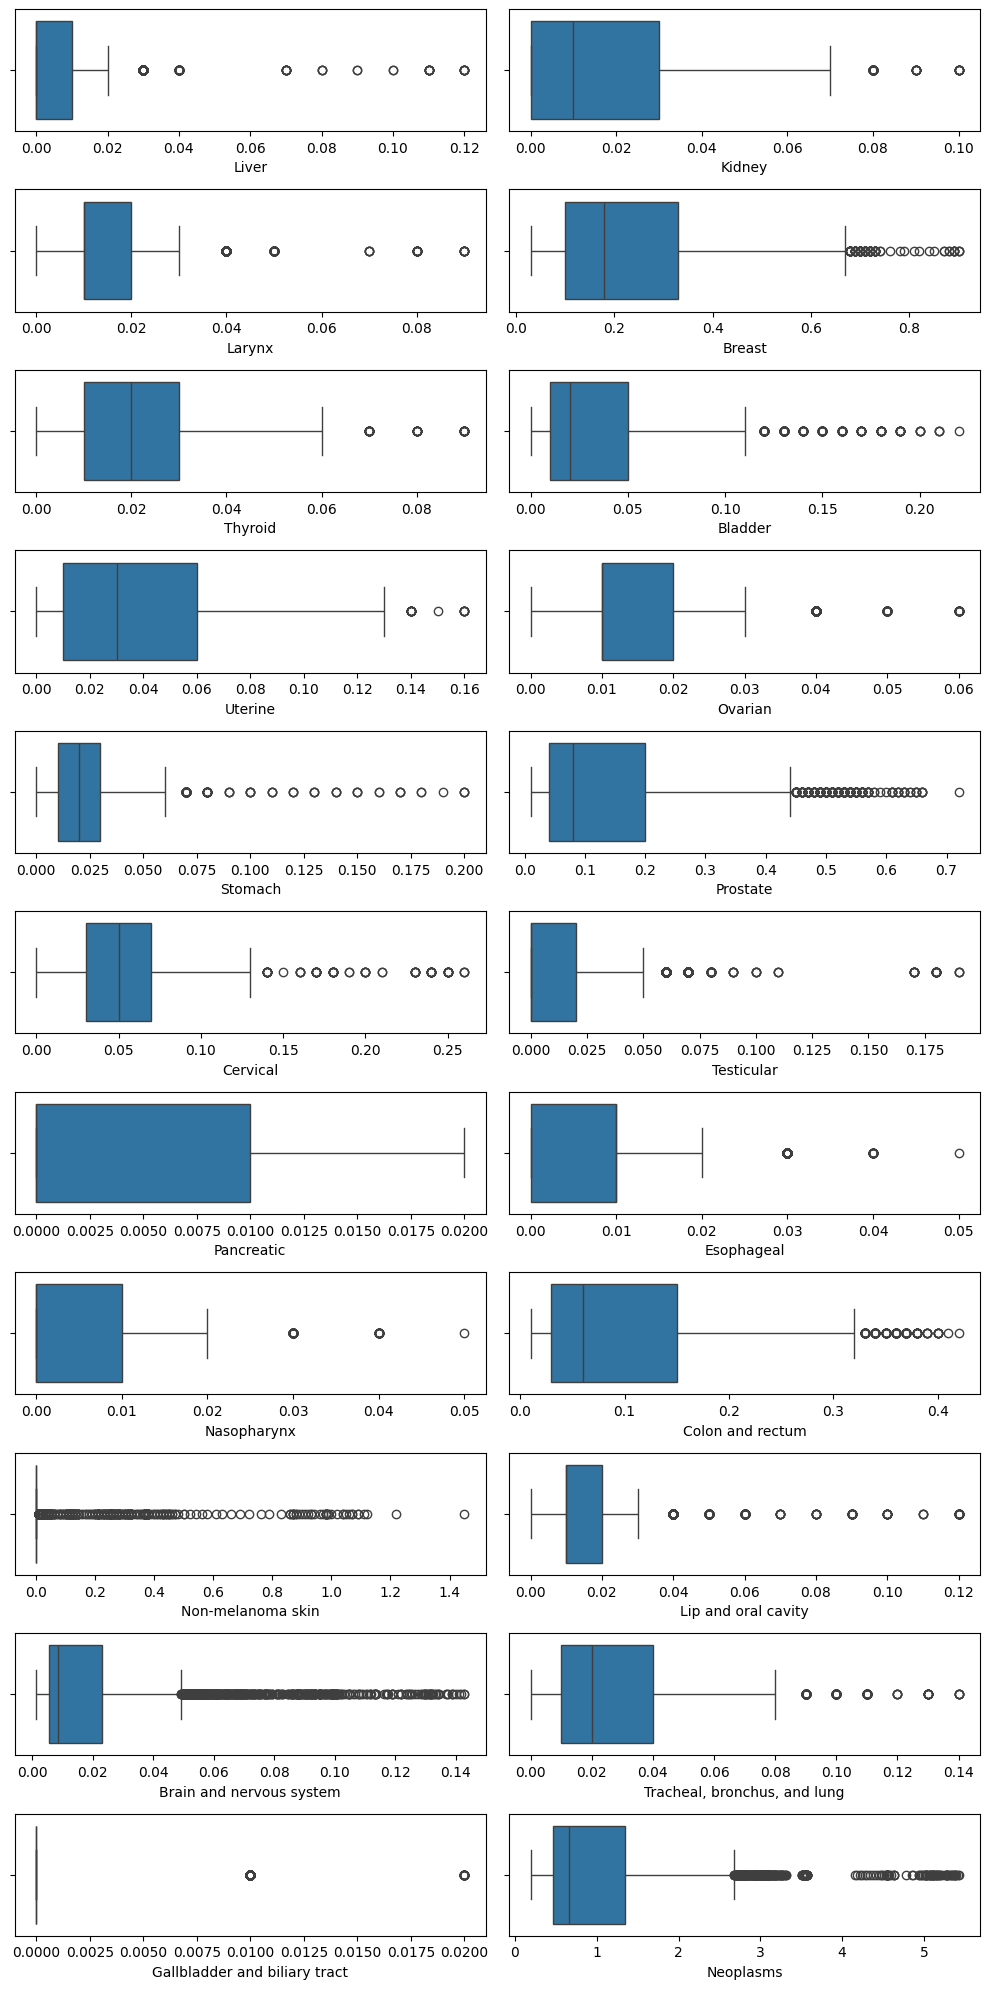

In [ ]:
#-------------------------------------------------------------------------------
# The boxplots of outlier
#-------------------------------------------------------------------------------

data_numeric = data.select_dtypes(include='number').drop(columns=["Year"])

# Setting the size of subplots
_, ax = plt.subplots(nrows=11, ncols=2, figsize=(10, 20))
ax = ax.ravel()

# Display the boxplot
for index, column in enumerate(data_numeric.columns):
  sns.boxplot(data=data, ax=ax[index], x=column)

# Do not blocked any title or label
plt.tight_layout()
plt.show()

In [ ]:
#-------------------------------------------------------------------------------
# The summary of outlier variables from numeric columns
#-------------------------------------------------------------------------------

data_numeric = data.select_dtypes(include='number').drop(columns=["Year"])

# Using IQR method to detect outlier variables except Year
data_describe_numeric_q1 = data_describe_numeric.drop(columns=["Year"]).T["25%"] #data_numeric.quantile(0.25)
data_describe_numeric_q3 = data_describe_numeric.drop(columns=["Year"]).T["75%"] #data_numeric.quantile(0.75)
data_describe_numeric_iqr = data_describe_numeric_q3 - data_describe_numeric_q1

# Min and Max boundary to detect outlier
data_describe_numeric_min_iqr = data_describe_numeric_q1 - 1.5 * data_describe_numeric_iqr
data_describe_numeric_max_iqr = data_describe_numeric_q3 + 1.5 * data_describe_numeric_iqr

# Count the outliers
data_outlier_count = ( (data_numeric < data_describe_numeric_min_iqr) | (data_numeric > data_describe_numeric_max_iqr) ).sum()

# Get the name of numeric column
data_numeric_column = list(data_numeric.columns)

# Get the total rows
data_row_numeric_count = list( [ len(data_numeric) ] * len(data_numeric.columns) )

# outlier variables / Total rows of numeric column
data_outlier_rate = np.divide( list(data_outlier_count), data_row_numeric_count, out=np.zeros_like(data_outlier_count, dtype=float), where=(data_row_numeric_count != 0) ) * 100

data_outlier_summary = pd.DataFrame( zip( data_numeric_column,
                       data_row_numeric_count,
                       data_outlier_count,
                       data_outlier_rate ),
                    columns = [ "Column",
                            "Rows",
                            "Outlier Values",
                            "Outlier Rate %" ] )

data_outlier_summary.sort_values(by="Outlier Values", ascending=False)

,Column,Rows,Outlier Values,Outlier Rate %
16,Non-melanoma skin,7704,1576,20.456906
20,Gallbladder and biliary tract,7704,711,9.228972
18,Brain and nervous system,7704,533,6.918484
11,Testicular,7704,437,5.672378
17,Lip and oral cavity,7704,435,5.646417
7,Ovarian,7704,317,4.114746
21,Neoplasms,7704,303,3.933022
9,Prostate,7704,280,3.634476
2,Larynx,7704,243,3.154206
5,Bladder,7704,236,3.063344


The plots above indicate the presence of outliers in the most features, except Testicular features.

---

## **2.4 - Data Processing** <span id="2.4"></span>

---

### **2.4.1 - Data Cleaning** <span id="2.4.1"></span>

**Data Cleaning** is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct.

In [**2.3 - Quality Assessment**](#2.3), we examined the dataset and confirmed that there were no incorrect data formats. However, we identified missing values and outliers that need to be addressed.

The Year feature in the dataset is not essential for classifying cancer prevalence across different countries. Our primary goal is to investigate the internal relationships between the prevalence of various cancers and the living environments in different countries over the 30-year period from 1990 to 2019. As such, the Year feature is not needed.

We recommend discarding the Year feature and merging the Country and Code features to create unique identifiers for each country. The other feature data will be averaged based on these merged identifiers. This approach will enhance our clustering experiments while simplifying the model training process.

In [ ]:
# Discard the unimportant features
data.drop(columns=["Year"], inplace=True)

data_describe_numeric = data.describe(include='number')

In this list of unique values ​​of Country, we found that 55 variables do not belong to countries but to regions. We do not intend to count regions, so we discard those regions.

In [ ]:
# Discard the region
non_countries = [ "African Region (WHO)",
          "Andean Latin America",
          "Australasia",
          "Caribbean",
          "Central Africa",
          "Central Asia",
          "Central Europe",
          "Central Europe, Eastern Europe, and Central Asia",
          "Central Latin America",
          "Central Sub-Saharan Africa",
          "England",
          "East Asia",
          "East Asia & Pacific (WB)",
          "Eastern Europe",
          "Eastern Mediterranean Region (WHO)",
          "Eastern Sub-Saharan Africa",
          "Europe & Central Asia (WB)",
          "European Region (WHO)",
          "G20",
          "High SDI",
          "High-income",
          "High-income Asia Pacific",
          "High-middle SDI",
          "Latin America & Caribbean (WB)",
          "Latin America and Caribbean",
          "Low SDI",
          "Low-middle SDI",
          "Middle East & North Africa (WB)",
          "Middle SDI",
          "North Africa and Middle East",
          "North America",
          "North America (WB)",
          "Northern Ireland",
          "OECD Countries",
          "Oceania",
          "Region of the Americas (WHO)",
          "South-East Asia Region (WHO)",
          "South Asia",
          "South Asia (WB)",
          "Southeast Asia",
          "Southeast Asia, East Asia, and Oceania",
          "Southern Latin America",
          "Southern Sub-Saharan Africa",
          "Sub-Saharan Africa",
          "Sub-Saharan Africa (WB)",
          "Scotland",
          "Tropical Latin America",
          "World",
          "World Bank High Income",
          "World Bank Low Income",
          "World Bank Lower Middle Income",
          "World Bank Upper Middle Income",
          "Western Sub-Saharan Africa",
          "Western Pacific Region (WHO)",
          "Western Europe",
          "Wales" ]

data.drop( data[ data["Country"].isin(non_countries) ].index, inplace=True )

data.reset_index(drop=True, inplace=True)

In [ ]:
# Merging the country to get the average outcome from 1990 to 2019.
data = data.groupby(["Country", "Code"]).mean().reset_index()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        204 non-null    object 
 1   Code                           204 non-null    object 
 2   Liver                          202 non-null    float64
 3   Kidney                         202 non-null    float64
 4   Larynx                         202 non-null    float64
 5   Breast                         202 non-null    float64
 6   Thyroid                        202 non-null    float64
 7   Bladder                        202 non-null    float64
 8   Uterine                        202 non-null    float64
 9   Ovarian                        202 non-null    float64
 10  Stomach                        202 non-null    float64
 11  Prostate                       202 non-null    float64
 12  Cervical                       202 non-null    flo

---

### **2.4.2 - Missing Value Handling** <span id="2.4.2"></span>

**Missing Value Handling** usually uses some techniques:

1. **Median or Mean**

  - No matter use median or mean as imputation value, it has limitations. For example, imputing with the mean may not be appropriate if the data has extreme values, as it can be heavily influenced by outliers
  - Similarly, imputing with the median may not be appropriate if the data is multimodal, as it may not represent the true central tendency of the data

2. **Iterative**

  - An advanced imputation method that models each feature with missing values as a function of other features in a round-robin fashion. It uses a regression model to estimate missing values based on the observed values of other features. The imputation process is performed iteratively, with each iteration refining the imputed values until convergence or a specified maximum number of iterations is reached
  - Commonly used regression models: **Linear Regression**, **Bayesian Ridge** (regularized linear regression), **Decision Trees Regressor**, **Random Forest Regressor**, and **K-Neighbors Regressor**, etc.
  - **K-Neighbors Regressor** is different from KNN imputation, which learns from samples with missing values by using a distance metric that accounts for missing values, rather than imputing them

3. **K-Nearest Neighbors (KNN)**
  
  - KNN Imputer imputes missing values based on the nearest neighbors, which means it preserves the underlying relationships in the data. It takes into account the feature similarities between data points to estimate the missing values, making it more contextually relevant
  - **Non-Parametric** method, which means it does not make assumptions about the data's distribution. It is suitable for both numeric and categorical data, making it versatile in handling various types of missing values

4. **Multiple Imputation by Chained Equations (MICE)**

  - The procedure imputes missing data in a dataset through an iterative series of predictive models. In each iteration, each specified variable in the dataset is imputed using the other variables in the dataset. These iterations should be run until it appears that convergence has been met

**Method - Median or Mean**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Median or Mean
#-------------------------------------------------------------------------------
'''
# Median
data_missing_imputation = data_describe_numeric.T["50%"].T
# Average/Mean
data_missing_imputation = data_describe_numeric.T["mean"].T

data.fillna(value = data_missing_imputation)
'''

**Method - Iterative**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Iterative
#-------------------------------------------------------------------------------
'''
# Linear Regression
data_missing_iterative_estimator = LinearRegression()
# Bayesian Ridge
data_missing_iterative_estimator = BayesianRidge()
# Decision Trees Regressor
data_missing_iterative_estimator = DecisionTreeRegressor()
# Random Forest Regressor
data_missing_iterative_estimator = RandomForestRegressor()
# K-Neighbors Regressor
data_missing_iterative_estimator = KNeighborsRegressor()

# Initialization iterative imputation object
data_missing_iterative_imputation = IterativeImputer(estimator = data_missing_iterative_estimator, imputation_order = 'ascending')

# Replace the result in the original dataset
data[data_numeric.columns] = pd.DataFrame(data_missing_iterative_imputation.fit_transform(data_numeric), columns = data_numeric.columns)
'''

**Method - K-Nearest Neighbors (KNN)**

In [ ]:
#-------------------------------------------------------------------------------
# Method - K-Nearest Neighbors (KNN)
#-------------------------------------------------------------------------------

# Initialization KNN imputation object
data_missing_knn_imputation = KNNImputer()

# Replace the result in the original dataset
data[data_numeric.columns] = pd.DataFrame(data_missing_knn_imputation.fit_transform(data_numeric), columns = data_numeric.columns)

**Summary after Missing Values Handling**

In [ ]:
#-------------------------------------------------------------------------------
# The summary of missing variables from whole columns
#-------------------------------------------------------------------------------

# Get the name of columns
data_column = list(data.columns)
# Get the total rows
data_row_count = np.array([len(data)] * len(data_column))
# Count of missing variables
data_missing_count = data_row_count - np.array(data.count())
# Missing variables / Total rows
data_missing_rate = np.divide( data_missing_count, data_row_count, out=np.zeros_like(data_missing_count, dtype=float), where=(data_row_count != 0) ) * 100

data_missing_summary = pd.DataFrame( zip( data_column,
                       data_row_count,
                       data_missing_count,
                       data_missing_rate ),
                    columns = [ "Column",
                            "Rows",
                            "Missing Values",
                            "Missing Rate %" ] )

data_missing_summary.sort_values(by="Missing Values", ascending=False)

,Column,Rows,Missing Values,Missing Rate %
0,Country,204,0,0.0
1,Code,204,0,0.0
22,Gallbladder and biliary tract,204,0,0.0
21,"Tracheal, bronchus, and lung",204,0,0.0
20,Brain and nervous system,204,0,0.0
19,Lip and oral cavity,204,0,0.0
18,Non-melanoma skin,204,0,0.0
17,Colon and rectum,204,0,0.0
16,Nasopharynx,204,0,0.0
15,Esophageal,204,0,0.0


---

### **2.4.3 - Duplicate Handling** <span id="2.4.3"></span>

In [**2.3.4 - Duplicate Value**](#2.3.4), we observed that the dataset contains significant duplicates across most features, with the exceptions of 'Brain and Nervous System' and 'Neoplasms.' While many features exhibit a high number of duplicate values, replacing them is not straightforward. These values are derived from population proportions to calculate cancer prevalence, and certain regions may have individual cases or a small population base, which further diminishes their significance. Given that any transformation of the data could impact the final clustering results, we have decided not to handle these highly repeated features. Although the machine learning model will treat them as ordinal data, this approach aligns well with our clustering objectives.

In [ ]:
# Drop the duplicate rows
'''
data.drop_duplicates(inplace=True)
'''

**Summary after Duplicate Handling**

In [ ]:
#-------------------------------------------------------------------------------
# The summary of duplicate variables from whole columns
#-------------------------------------------------------------------------------
'''
# Quick check of unique value
data_unique_count = data.nunique()

# Unique variables / Total rows
data_duplicate_rate = ( np.ones(len(data_unique_count)) - np.divide( list(data_unique_count), data_row_count, out=np.zeros_like(data_unique_count, dtype=float), where=(data_row_count != 0) ) ) * 100

data_duplicate_summary = pd.DataFrame( zip ( data_column,
                         data_row_count,
                         data_unique_count,
                         data_duplicate_rate),
                     columns = [ "Column",
                             "Rows",
                             "Unique Values",
                             "Duplicate Rate %" ] )

data_duplicate_summary.sort_values(by="Duplicate Rate %", ascending=False)
'''

---

### **2.4.4 - Outlier Handling** <span id="2.4.4"></span>

**Outlier Handling** usually uses four different techniques:

1. **Deleting Observations**

  - We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers
  - **BUT** deleting the observation is not a good idea when we have small dataset

2. **Transforming Values**

  - Transforming variables can also eliminate outliers. These transformed values reduces the variation caused by extreme values
  - If dataset has to many extreme values or skewed, **Log Transformation**, **Cube Root Normalization**, **Box-transformation**, **Yeo-Johnson Power Transformation**, etc., those techniques convert values in the dataset to smaller values
  - **BUT** these technique not always give the best results. For example, **Log Transformation** requires that each transformed value not closing to zero; **Box-transformation** requires that each transformed value is positive, otherwise **Yeo-Johnson Power Transformation** needs to be used as an alternative

3. **Imputation**
  
  - Like imputation of missing values, we can also impute outliers. We can use **Mean**, **Median**, **Zero** value in this methods. Since we imputing there is no loss of data
  - Use missing value imputation methods, such as **Iterative Imputation** and **K-Nearest Neighbors (KNN) Imputation**

4. **Separately Treating**

  - If there are significant number of outliers and dataset is small , we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output
  - **BUT** this technique is tedious when the dataset is large

In [**2.3.5 - Outlier Value**](#2.3.5), we examined the dataset and identified a lot of outlier values in the most features. Given the critical role that all data plays in clustering, we cannot afford to discard any outliers. However, to preserve the significance of extreme values while ensuring they remain meaningful within the analysis, we will employ transformation techniques. These methods will adjust the extreme values into a more reasonable range, maintaining their original importance in the dataset.

In [ ]:
data_numeric = data.select_dtypes(include='number')

# Using IQR method to detect outlier variables except Year
data_describe_numeric_q1 = data_describe_numeric.T["25%"] #data_numeric.quantile(0.25)
data_describe_numeric_q3 = data_describe_numeric.T["75%"] #data_numeric.quantile(0.75)
data_describe_numeric_iqr = data_describe_numeric_q3 - data_describe_numeric_q1

# Min and Max boundary to detect outlier
data_describe_numeric_min_iqr = data_describe_numeric_q1 - 1.5 * data_describe_numeric_iqr
data_describe_numeric_max_iqr = data_describe_numeric_q3 + 1.5 * data_describe_numeric_iqr

# Count the outliers
data_outlier_count = ( (data_numeric < data_describe_numeric_min_iqr) | (data_numeric > data_describe_numeric_max_iqr) ).sum()

data_outlier_count.sort_values(ascending=False)

,0
Gallbladder and biliary tract,45
Non-melanoma skin,28
Brain and nervous system,26
Colon and rectum,19
Testicular,15
Lip and oral cavity,11
Ovarian,5
Pancreatic,0
"Tracheal, bronchus, and lung",0
Nasopharynx,0


**Method - Deleting Observations**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Deleting observations
#-------------------------------------------------------------------------------
'''
for _, column in enumerate(data_outlier_count.loc[data_outlier_count > 0].index):
  data.drop( data[ (data[column] < data_describe_numeric_min_iqr[column]) | (data[column] > data_describe_numeric_max_iqr[column]) ].index, inplace=True )

data.reset_index(drop=True, inplace=True)
'''

**Method - Transforming Values**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Transforming values - Log Transformation
#-------------------------------------------------------------------------------
'''
# If data value closing to 0, DO NOT use this method
for _, column in enumerate(data_outlier_count.loc[data_outlier_count > 0].index):
  data[column] = np.log(data[column])
'''

In [ ]:
#-------------------------------------------------------------------------------
# Method - Transforming values - Cube Root Normalization
#-------------------------------------------------------------------------------

for _, column in enumerate(data_outlier_count.loc[data_outlier_count > 0].index):
  data[column] = (data[column]**(1/3))

In [ ]:
#-------------------------------------------------------------------------------
# Method - Transforming values - Box-Transformation or Yeo-Johnson Power Transformation
#-------------------------------------------------------------------------------
'''
# Boxcox requires all of the elements must be positive, otherwise use Yeo-Johnson Power Transformation
for _, column in enumerate(data_outlier_count.loc[data_outlier_count > 0].index):
  if np.any(data[column] <= 0):
    data[column], _ = scipy.stats.yeojohnson(data[column], lmbda=None)
  else:
    data[column], _ = scipy.stats.boxcox(data[column], lmbda=None)
'''

**Method - Imputation**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Imputation - Median, Mean, Zero
#-------------------------------------------------------------------------------
'''
# Median
data_precipitation_outlier_imputation = data_describe_numeric["Precipitation"]["50%"] # data["Precipitation"].midian()
# Average/Mean
data_precipitation_outlier_imputation = data_describe_numeric["Precipitation"]["mean"] # data["Precipitation"].mean()
# Zero
data_precipitation_outlier_imputation = 0

data["Precipitation"] = np.where( (data["Precipitation"] < data_describe_numeric_min_iqr["Precipitation"]) | (data["Precipitation"] > data_describe_numeric_max_iqr["Precipitation"]), data_precipitation_outlier_imputation, data["Precipitation"] )
'''

**Visualize the Boxplot after Outlier Handling**

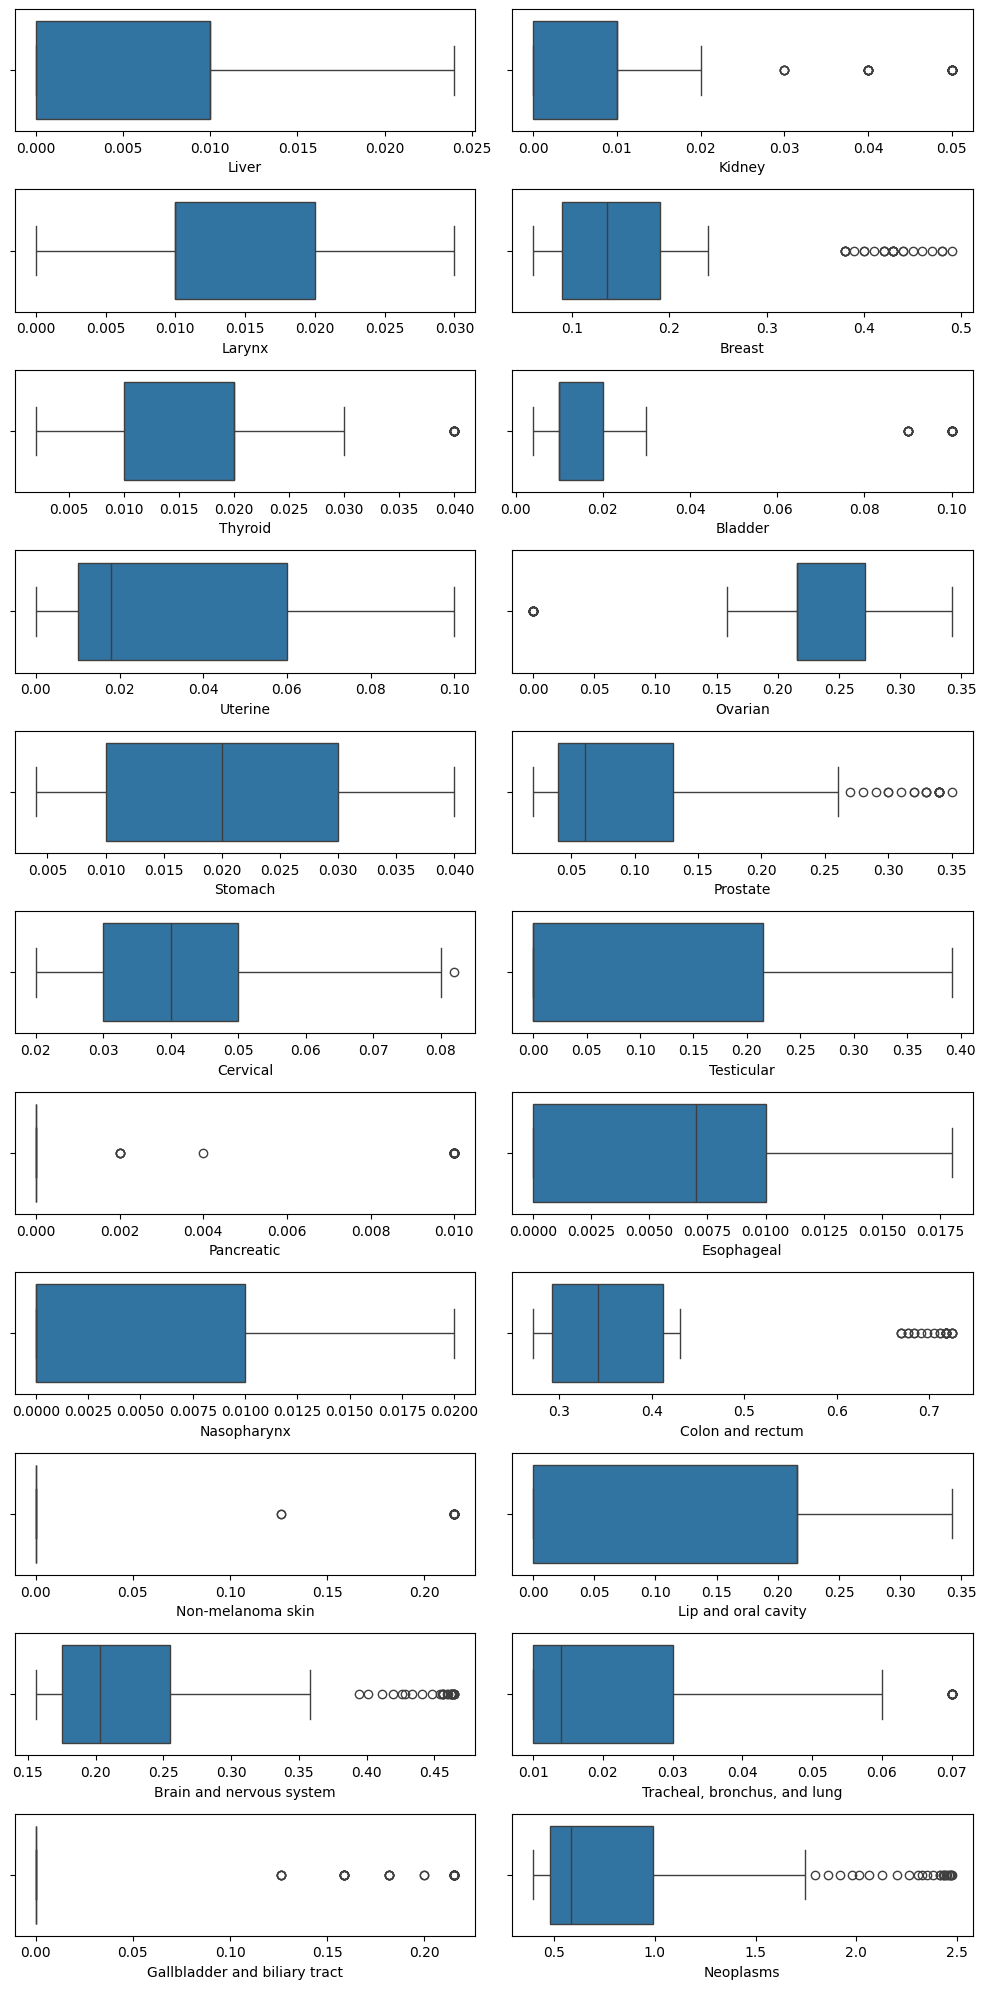

In [ ]:
#-------------------------------------------------------------------------------
# The boxplots
#-------------------------------------------------------------------------------

# Setting the size of subplots
_, ax = plt.subplots(nrows=11, ncols=2, figsize=(10, 20))
ax = ax.ravel()

# Display the boxplot
for index, column in enumerate(data_numeric.columns):
  sns.boxplot(data=data, ax=ax[index], x=column)

# Do not blocked any title or label
plt.tight_layout()
plt.show()

---

### **2.4.5 - Centering and Scaling** <span id="2.4.5"></span>

**Centering and Scaling** ensures that the criterion for finding linear combinations of the predictors is based on how much variation they explain and therefore improves the numerical stability.

- **Standard Scaling** - Converts features to **standard normal** variables, and it centers and scales a variable to mean 0 and standard deviation 1
- **Min-Max Scaling** - Convert variables to continuous variables in the \[0, 1\] interval by mapping minimum values to 0 and maximum values to 1
- **Robust Scaling** - Similar to min-max scaling, but instead maps the **interquartile range** (Q3 - Q1) to \[0, 1\] interval, it means the variable itself takes values outside of the \[0, 1\] interval

In [**2.2 - Data Decription**](#2.2), we observed that most numeric features fall within the range [0, 1]. Additionally, since we have already addressed the extreme values, it is unlikely that any values will exceed this range significantly. Therefore, we can forgo the processes of centering and scaling at this stage.

In [ ]:
# Get the data with type numeric that AFTER cleaning and outlier handling
data_numeric = data.select_dtypes(include='number')

**Method - Standard Scaling**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Standard Scaling
#-------------------------------------------------------------------------------
'''
data[data_numeric.columns] = StandardScaler().fit_transform(data_numeric)
'''

**Method - Min-Max Scaling**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Min-Max Scaling
#-------------------------------------------------------------------------------
'''
data[data_numeric.columns] = MinMaxScaler().fit_transform(data_numeric)
'''

**Method - Robust Scaling**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Robust Scaling
#-------------------------------------------------------------------------------
'''
data[data_numeric.columns] = RobustScaler().fit_transform(data_numeric)
'''

**Visualize the Boxplot after Centering and Scaling**

In [ ]:
#-------------------------------------------------------------------------------
# The boxplots
#-------------------------------------------------------------------------------
'''
# Setting the size of subplots
_, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))
ax = ax.ravel()

# Display the boxplot
for index, column in enumerate(data_numeric.columns):
  sns.boxplot(data=data, ax=ax[index], x=column)

# Do not blocked any title or label
plt.tight_layout()
plt.show()
'''

---

### **2.4.6 - Data Transformation** <span id="2.4.6"></span>

Features and predicted data are often **Skewed** (distorted away from the center), it degrades the model's ability to describe typical cases as it has to deal with rare cases on extreme values (**especially regression based models**).

**Data Transformation** usually can solve the skewed data. To ensure that the machine learning model capabilities is not affected, skewed data has to be transformed to approximate to a normal distribution. The method used to transform the skewed data depends on the characteristics of the data.

- Popular data transformation techniques include **Log Transformation**, **Cube Root Normalization**, **Box-Transformation**, **Yeo-Johnson Power Transformation**, etc.

- **BUT** these technique not always give the best results. For example, **Log Transformation** requires that each transformed value not closing to zero; **Box-Transformation** requires that each transformed value is positive, otherwise **Yeo-Johnson Power Transformation** needs to be used as an alternative


**It is worth noting that tree-based models are not affected by these issues**, as they can effectively ignore correlation concerns. Consequently, tree-based models do not require data transformation, centering, or scaling.

Even after addressing outliers in [**2.4.4 - Outlier Handling**](#2.4.4) and applying centering and scaling in [**2.4.5 - Centering and Scaling**](#2.4.5), the boxplot still shows these few features remains skewed.

**Method - Log Transformation**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Log Transformation
#-------------------------------------------------------------------------------
'''
# If data value closing to 0, DO NOT use this method
for _, column in enumerate(data_numeric.columns):
  data[column] = np.log(data[column])
'''

**Method - Cube Root Transformation**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Cube Root Normalization
#-------------------------------------------------------------------------------
'''
for _, column in enumerate(data_numeric.columns):
  data[column] = (data[column]**(1/3))
'''

**Method - Box-Transformation or Yeo-Johnson Power Transformation**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Box-Transformation or Yeo-Johnson Power Transformation
#-------------------------------------------------------------------------------

# Boxcox requires all of the elements must be positive, otherwise use Yeo-Johnson Power Transformation
for _, column in enumerate(data_numeric.columns):
  if np.any(data[column] <= 0):
    data[column], _ = scipy.stats.yeojohnson(data[column], lmbda=None)
  else:
    data[column], _ = scipy.stats.boxcox(data[column], lmbda=None)

**Summary after Transformation**

In [ ]:
#-------------------------------------------------------------------------------
# The summary of skewness and kurtosis
#-------------------------------------------------------------------------------

# Get the data with type numeric
data_numeric = data.select_dtypes(include='number')

# Get the skewness for numeric column
data_numeric_skew = data_numeric.skew()
# Get the kurtosis for numeric column
data_numeric_kurtosis = data_numeric.kurtosis()

data_normal_summary = pd.DataFrame( zip( data_numeric_column,
                        data_numeric_skew,
                        data_numeric_kurtosis ),
                     columns = [ "Column",
                             "Skewness",
                             "Kurtosis" ] )

data_normal_summary.sort_values(by="Skewness", ascending=False)

,Column,Skewness,Kurtosis
16,Non-melanoma skin,2.123955,2.536021
12,Pancreatic,1.704845,0.960410
20,Gallbladder and biliary tract,1.358734,-0.153871
14,Nasopharynx,0.695623,-1.397065
11,Testicular,0.681623,-1.480468
6,Uterine,0.350256,-1.327284
18,Brain and nervous system,0.311434,-1.278869
19,"Tracheal, bronchus, and lung",0.288779,-1.631725
21,Neoplasms,0.278192,-1.154785
1,Kidney,0.248250,-0.642949


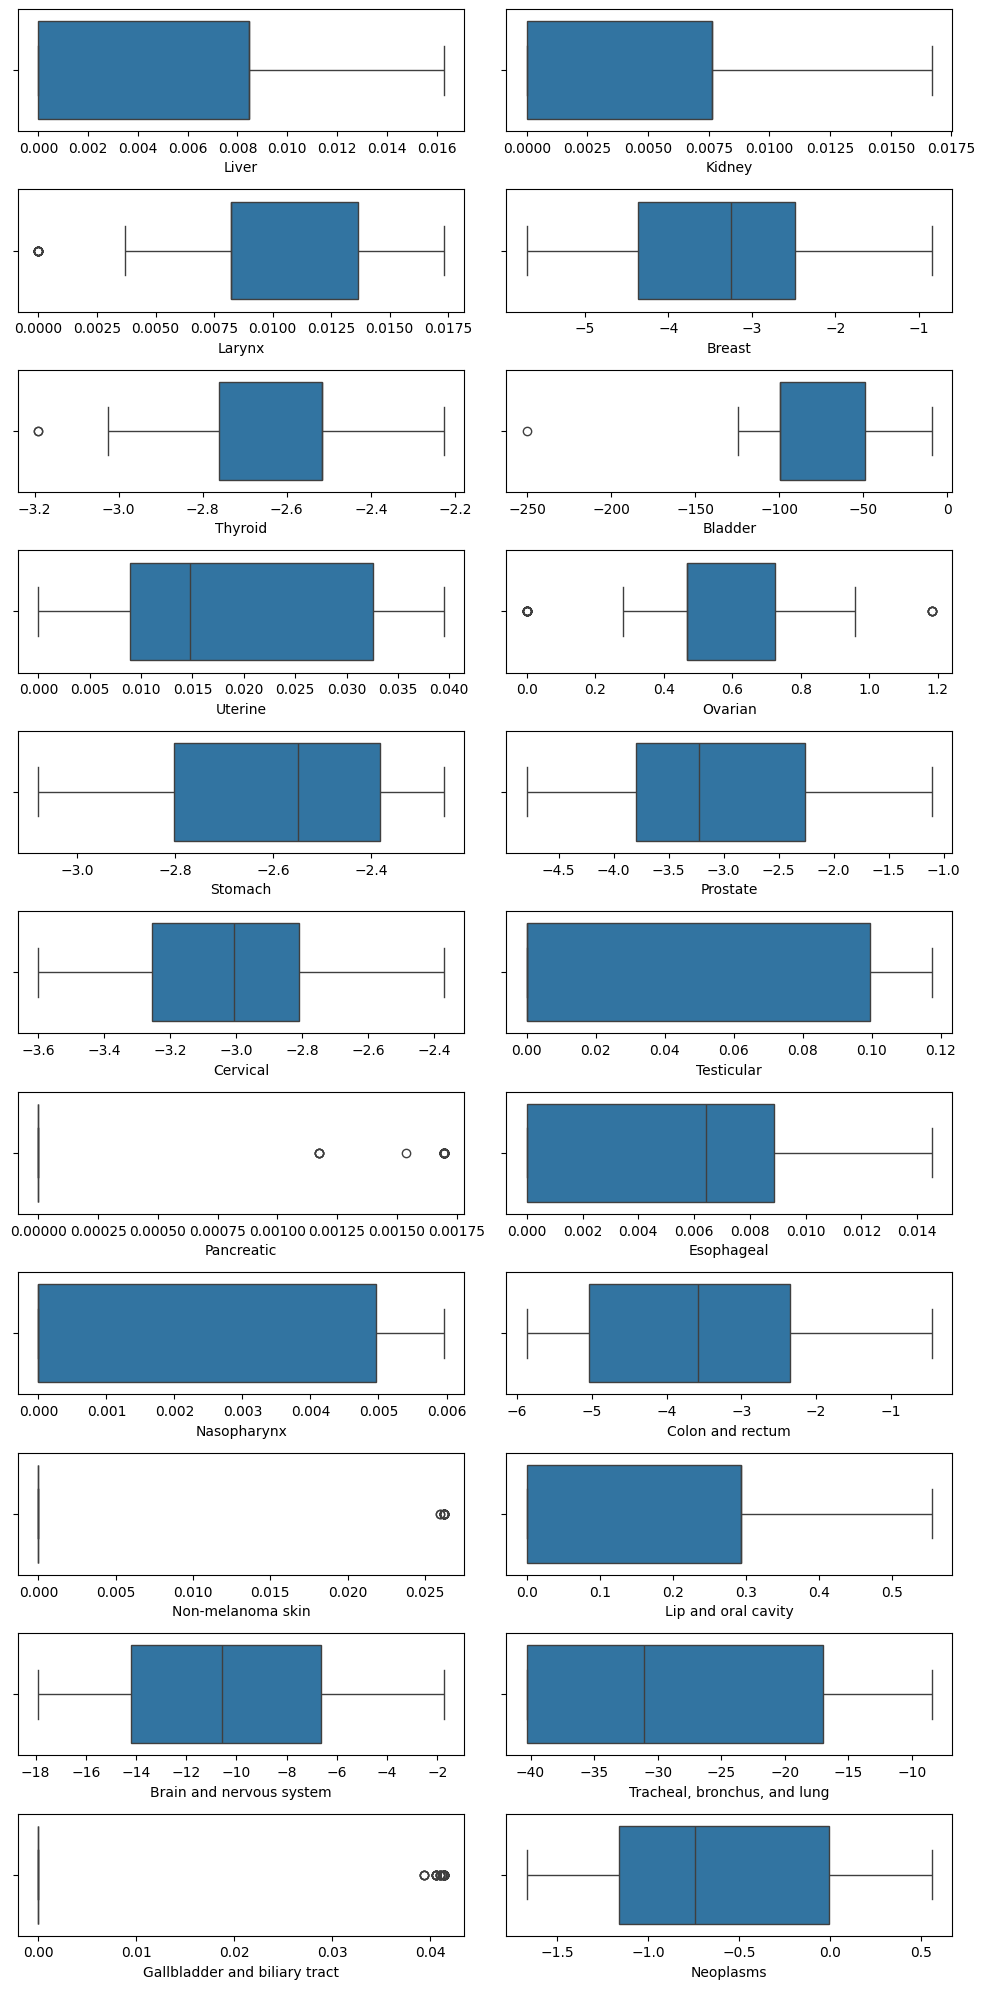

In [ ]:
data_numeric = data.select_dtypes(include='number')

# Setting the size of subplots
_, ax = plt.subplots(nrows=11, ncols=2, figsize=(10, 20))
ax = ax.ravel()

# Display the boxplot
for index, column in enumerate(data_numeric.columns):
  sns.boxplot(data=data, ax=ax[index], x=column)

# Do not blocked any title or label
plt.tight_layout()
plt.show()

---

### **2.4.7 - Correlation Coefficient** <span id="2.4.7"></span>

Understanding the correlations between variables in a model is essential for several reasons:

1. **Feature selection**

  - Process of choosing which variables or features to use in the model. Highly correlated features provide redundant information, so feature selection aims to remove uninformative features to simplify models

  - By analyzing correlations, we can identify redundant features and select a minimal set of important features that best represent the target variable. This prevents overfitting and improves a model's ability to generalize

2. **Reduce Bias**

  - Correlation analysis is also important for ensuring model fairness and avoiding bias. When certain features are highly correlated with sensitive attributes like gender or ethnicity, it can inadvertently encode biases into machine learning models if not properly addressed

  - If a model relies too heavily on these correlated features, it risks discriminating against or disadvantaging certain groups. By identifying correlations between input features and sensitive attributes, we can evaluate models for potential biases, monitor feature importance, and apply techniques like fair representation learning to mitigate bias

3. **Multicollinearity**

  - Another important aspect of analyzing feature correlations is detecting multicollinearity. Multicollinearity occurs when two or more predictor variables in a model are highly linearly correlated with each other. It can negatively impact models by increasing variance and making it difficult to determine the significance and effect of individual predictors

  - Variables with high multicollinearity provide redundant information, similar to how correlated features do. However, multicollinearity is more problematic because it inflates standard errors and undermines reliability of estimated coefficients. By examining correlation matrices and variance inflation factors, we can identify cases of multicollinearity between input features

4. **Interpretability and Debugging**

  - Understanding correlations also aids in interpreting machine learning models. As models become increasingly complex with many interacting variables, it can be difficult to explain why a model makes certain predictions

  - By analyzing the correlation between input features and output targets, we gain insights into which variables have the strongest impact on the model's decisions. Knowing feature correlations further assists in debugging models that perform poorly. It allows we to identify any features that may be overwhelming the model or causing unintended biases

**Interpreting a Correlation Coefficient**

- The value of the correlation coefficient always ranges between 1 and -1, and we treat it as a general indicator of the strength of the relationship between variables

- The sign of the coefficient reflects whether the variables change in the same or opposite directions: a positive value means the variables change together in the same direction, while a negative value means they change together in opposite directions

- The absolute value of a correlation coefficient tells the magnitude of the correlation: the greater the absolute value, the stronger the correlation

| Correlation Coefficient	 | Strength of Linearity / Monotonically | Correlation Type |
| :---: | :---: | :---: |
| -0.75 to -1 | Perfectly | Negative |
| -0.5 to -0.75 | Strong | Negative |
| -0.25 to -0.5 | Moderate | Negative |
| 0 to -0.25 | Weak | Negative |
| 0 | None | Zero |
| 0 to 0.25 | Weak | Positive |
| 0.25 to 0.5 | Moderate | Positive |
| 0.5 to 0.75 | Strong | Positive |
| 0.75 to 1 | Perfectly | Positive |

<br/>

**Methods of Calculate the Correlation Coefficient**

Usually we use two mainstream methods to calculate the correlation coefficient:

1. **Pearson's Correlation Coefficient**

  - The Pearson's correlation coefficient describes the linear relationship between two quantitative variables

  - The assumptions for use Pearson's correlation coefficient:

    1. Expect a linear relationship between the two variables
    2. Both variables are on an interval or ratio level of measurement
    3. Data from both variables follow normal distributions
    4. Data have no outliers

  - **BUT** it's not a good measure of correlation if variables have a nonlinear relationship, or if data have outliers, skewed distributions, or come from categorical variables

2. **Spearman's Rank-Order Correlation**

  - Spearman's rank correlation coefficient is the most common alternative to Pearson method. It uses the rankings of data from each variable (e.g., from lowest to highest) rather than the raw data itself

  - Use Spearman method when data fail to meet the assumptions of Pearson method. This happens when at least one of variables is on an ordinal level of measurement or when the data from one or both variables do not follow normal distributions

  - Spearman's correlation coefficient measures the monotonicity of relationships, and monotonic relationships are less restrictive than linear relationships

    - Positive monotonic: when one variable increases, the other also increases

    - Negative monotonic: when one variable increases, the other decreases

In [**2.4.6 - Data Transformation**](#2.4.6), we deal with non normally distributed, but we still have couple of features that were non normally distributed. Therefore, some assumptions for Pearson's correlation coefficient are not met. Apply Spearman's rank-order correlation for our analysis.

**Method - Pearson's Correlation Coefficient**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Pearson's Correlation Coefficient
#-------------------------------------------------------------------------------
'''
# Computing the Pearson's correlation coefficient, BUT corr() won't have P-value
#data_numeric_correlation = data_numeric.corr(method='pearson')

# Computing the Pearson's correlation coefficient and P-value
data_numeric_correlation = np.ones(shape=(data_numeric.shape[1], data_numeric.shape[1]))
data_numeric_correlation_p = np.zeros(shape=(data_numeric.shape[1], data_numeric.shape[1]))
for index_1, column_1 in enumerate(data_numeric.columns):
  for index_2, column_2 in enumerate(data_numeric.columns):
    if index_1 != index_2:
      data_numeric_correlation[index_1, index_2], data_numeric_correlation_p[index_1, index_2] = scipy.stats.pearsonr(data_numeric[column_1], data_numeric[column_2])
'''

**Method - Spearman's Correlation Coefficient**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Spearman's Rank-Order Correlation
#-------------------------------------------------------------------------------

# Computing the Spearman's correlation coefficient, BUT corr() won't have P-value
#data_numeric_correlation = data_numeric.corr(method='spearman')

# Computing the Spearman's correlation coefficient and P-value
data_numeric_correlation = np.ones(shape=(data_numeric.shape[1], data_numeric.shape[1]))
data_numeric_correlation_p = np.zeros(shape=(data_numeric.shape[1], data_numeric.shape[1]))
for index_1, column_1 in enumerate(data_numeric.columns):
  for index_2, column_2 in enumerate(data_numeric.columns):
    if index_1 != index_2:
      data_numeric_correlation[index_1, index_2], data_numeric_correlation_p[index_1, index_2] = scipy.stats.spearmanr(data_numeric[column_1], data_numeric[column_2])

**Visualize the Heatmap of Correlation Coefficient**

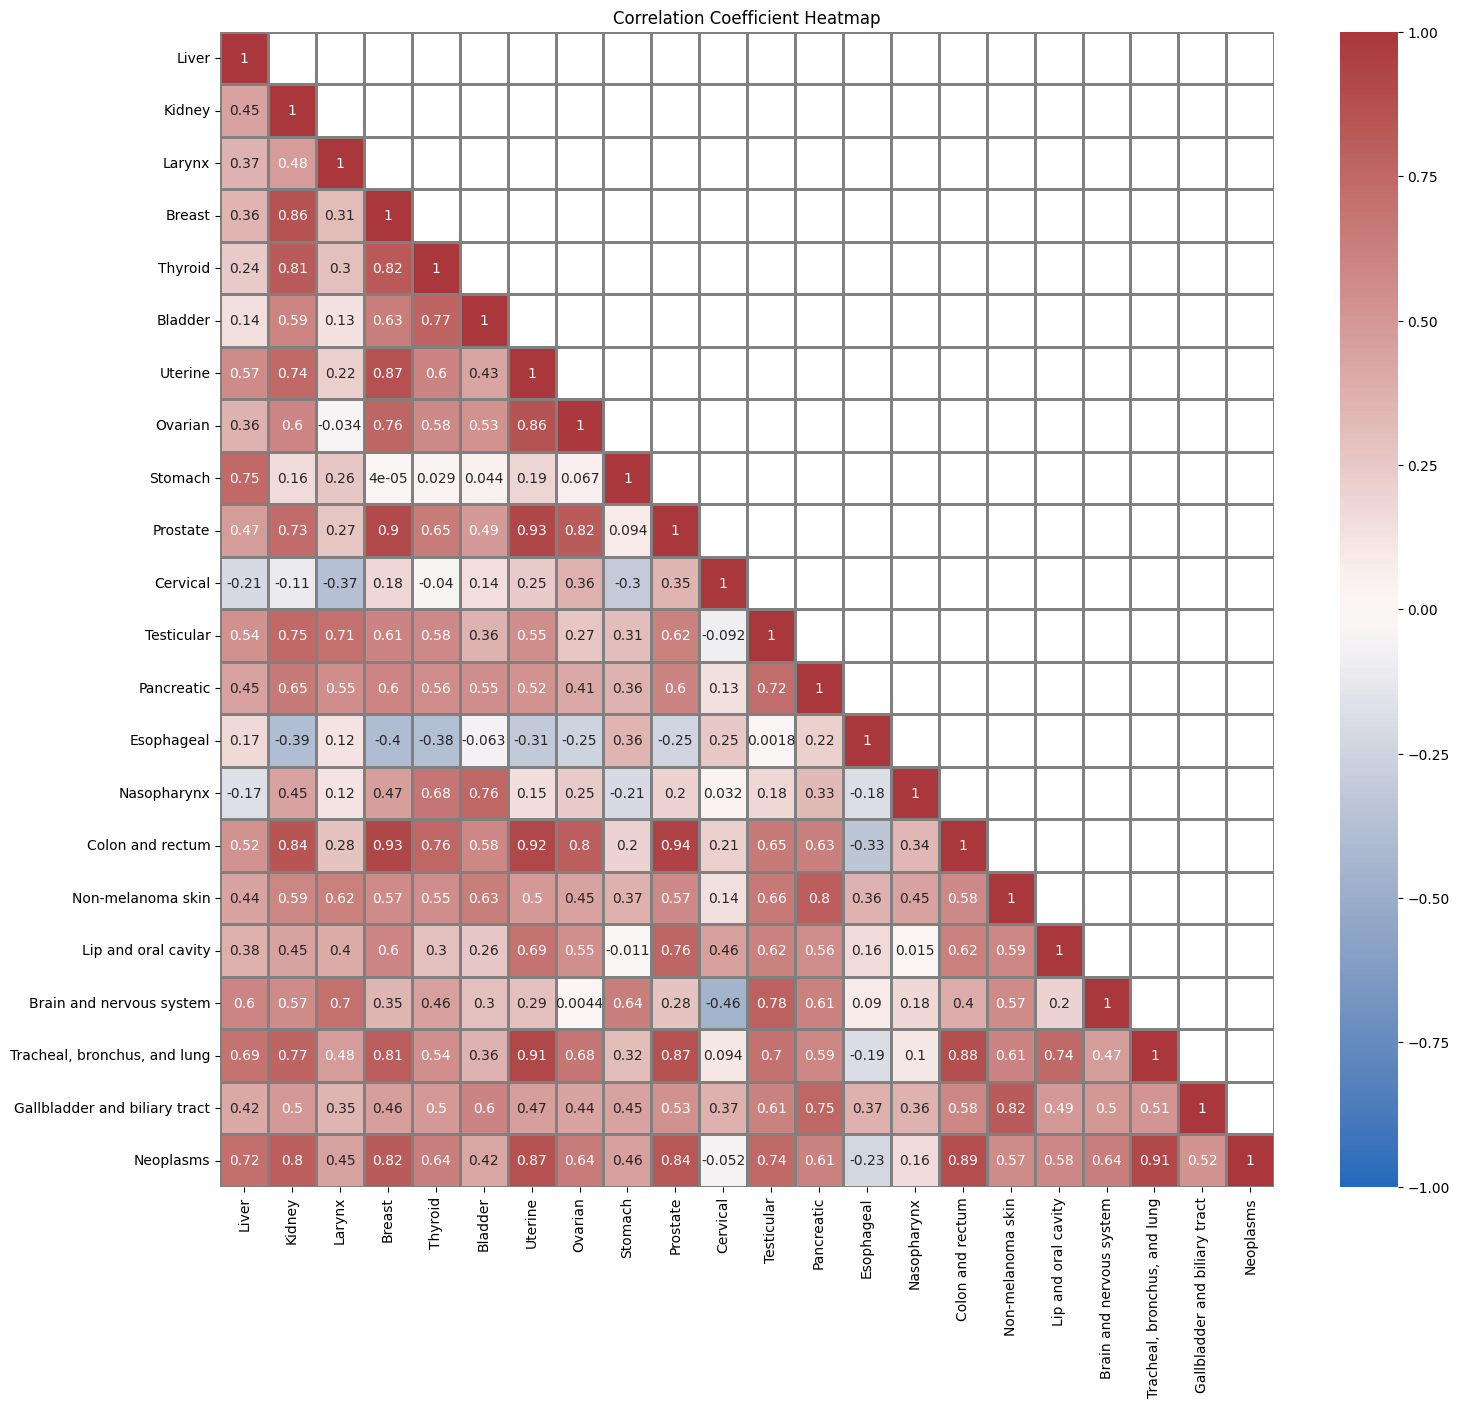

In [ ]:
# Display the heatmap of correlation coefficient
_, ax = plt.subplots(figsize=(17, 15))
sns.heatmap( data_numeric_correlation,
       ax = ax,
       mask = np.triu(data_numeric_correlation, 1),
       xticklabels = data_numeric.columns,
       yticklabels = data_numeric.columns,
       annot = True,
       center = 0,
       vmin = -1,
       vmax = 1,
       cmap = 'vlag',
       linecolor = 'gray',
       linewidths = 1 )

plt.title("Correlation Coefficient Heatmap")
plt.show()

**Visualize the Heatmap of Correlation Coefficient P-Value**

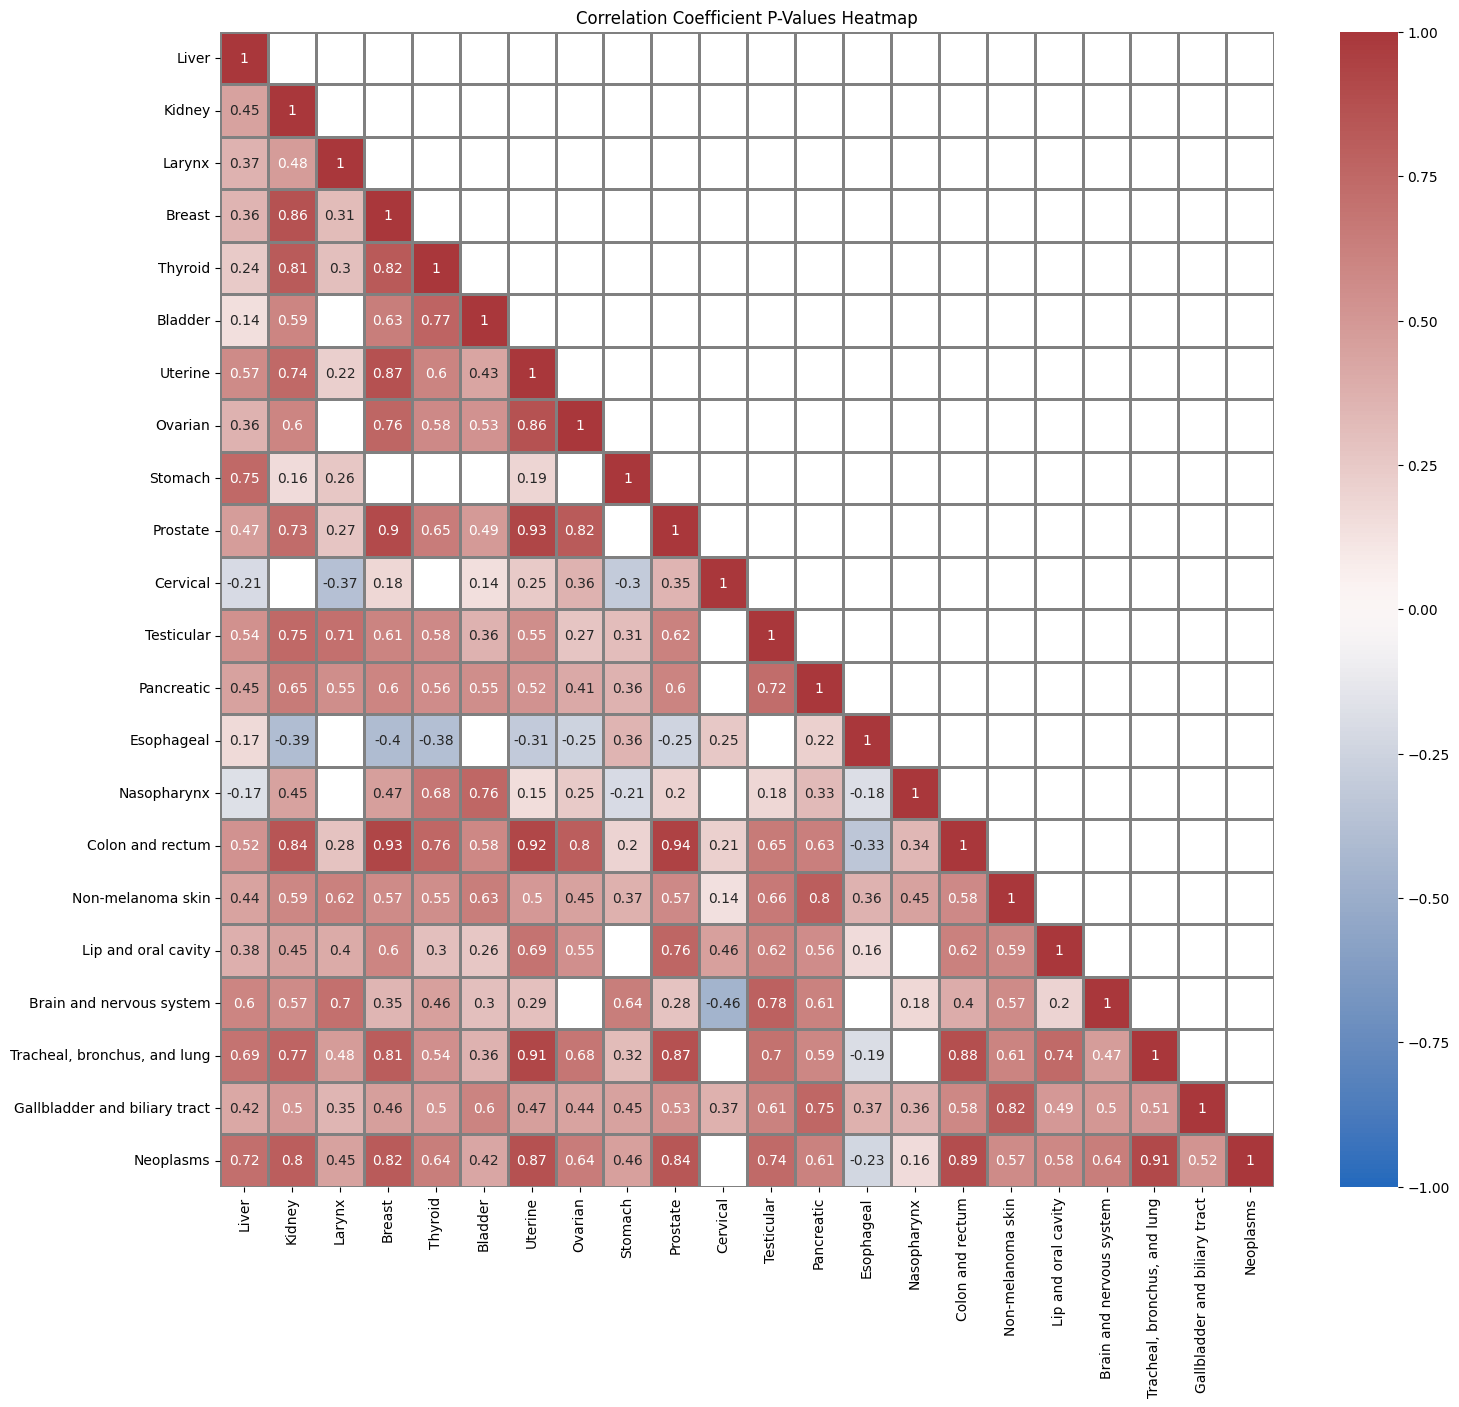

In [ ]:
# Display the heatmap of correlation coefficient after P-values hypothesis test
_, ax = plt.subplots(figsize=(17, 15))
sns.heatmap( data_numeric_correlation,
       ax = ax,
       mask = np.invert(np.tril(data_numeric_correlation_p < 0.05)),
       xticklabels = data_numeric.columns,
       yticklabels = data_numeric.columns,
       annot = True,
       center = 0,
       vmin = -1,
       vmax = 1,
       cmap = 'vlag',
       linecolor = 'gray',
       linewidths = 1 )

plt.title('Correlation Coefficient P-Values Heatmap')
plt.show()

From the two plots above, we observed that all numerical features exhibit correlation with one another. Except for Cervical and Espohageal features has negative correlation to another features.

---

### **2.4.8 - Data Encoding** <span id="2.4.8"></span>

**Data Encoding** refers to the process of converting categorical or textual data into numerical format, so that it can be used as input for algorithms to process. The reason for encoding is that most machine learning algorithms work with numbers and not with text or categorical variables.

There are two types of categorical data:

- **Nominal Data** - The categories of data do not have an inherent order. This means that the categories cannot be ranked or ordered. For example: Occupational titles for doctor, lawyer, instructor, athlete, etc.

- **Ordinal Data** - The categories of data have an inherent order. This means that the categories can be ranked or ordered from highest to lowest or vice versa. For example: Grades start with A+, A, A-, B+, B, B-, etc.

**Methods of Data Encoding**

The choice of encoding method can have a significant impact on model performance, so it is important to choose an appropriate encoding technique based on the nature of the data and the specific requirements of the model.

1. **One-Hot Encoding**
  - Binary column is created for each unique category in the variable. If a category is present in a sample, the corresponding column is set to 1, and all other columns are set to 0
  - In the case of one-hot encoding, for N categories in a variable, it uses N binary variables
  - For example, if a variable has three categories A, B and C, they can be represented as \[1, 0, 0\], \[0, 1, 0\] and \[0, 0, 1\], respectively

2. **Dummy Encoding**
  - Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables 0/1
  - The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N categories
  - For example, if a variable has three categories A, B and C, they can be represented as \[1, 0\] and \[0, 1\], respectively

3. **Binary Encoding**
  - Similar to one-hot encoding, but instead of creating a separate column for each category, the categories are represented as binary digits
  - For example, if a variable has four categories A, B, C and D, they can be represented as 0001, 0010, 0100 and 1000, respectively

4. **Label Encoding**
  - Each unique category is assigned a Unique Integer value
  - But the assigned integers may be misinterpreted by the machine learning algorithm as having an ordered relationship when in fact they do not.
  - For example, if a variable has four categories A, B, C and D, they can be represented as 0, 1, 2 and 3, respectively

4. **Ordinal Encoding**
  - Ordinal encoding is used when the categories in a variable have an inherent ordering
  - The categories are assigned a numerical value based on their order, such as 1, 2, 3, etc.
  - For example, if a variable has categories Low, Medium and High, they can be assigned the values 1, 2, and 3, respectively

In sections [**2.2 - Data Description**](#2.2) and [**2.4.1 - Data Cleaning**](#2.4.1), we identified two textual features: Country and Code. As there are no categorical features requiring further processing, we can proceed to the next step.

**Method - One-Hot Encoding**

In [ ]:
#-------------------------------------------------------------------------------
# Method - One-Hot Encoding
#-------------------------------------------------------------------------------
'''
data_encoding_object = pd.DataFrame(data["Location"], columns=["Location"])
data_encoding_object = pd.get_dummies(data_encoding_object["Location"], columns=["Location"])

# Drop the old features
data.drop(columns=["Location"], inplace=True)
# Combination to the original data
data = pd.concat( [data, data_encoding_object], axis=1 )
'''

**Method - Dummy Encoding**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Dummy Encoding
#-------------------------------------------------------------------------------
'''
data_encoding_object = pd.DataFrame(data["Location"], columns=["Location"])
data_encoding_object = pd.get_dummies(data_encoding_object["Location"], drop_first=True, columns=["Location"])

# Drop the old features
data.drop(columns=["Location"], inplace=True)
# Combination to the original data
data = pd.concat( [data, data_encoding_object], axis=1 )
'''

**Method - Binary Encoding**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Binary Encoding
#-------------------------------------------------------------------------------
'''
data_encoding_object_rank = { city : index for index, city in enumerate(data["Location"].unique()) }

data["Location"] = data["Location"].map(data_encoding_object_rank).apply(lambda x: format(x, 'b'))
'''

**Method - Label Encoding**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Label Encoding
#-------------------------------------------------------------------------------
'''
data_encoding_object_rank = { city : index for index, city in enumerate(data["Location"].unique()) }

data["Location"] = data["Location"].map(data_encoding_object_rank)
'''

**Method - Ordinal Encoding**

In [ ]:
#-------------------------------------------------------------------------------
# Method - Ordinal Encoding
#-------------------------------------------------------------------------------
'''
EXAMPLE
# Identity the order of the categories
data_encoding_object_rank = { "low=": 0,
                 "medium": 1,
                 "high": 2 }

data["Location"] = data["Location"].map(data_encoding_object_rank)
'''

**Summary after Data Encoding**

In [ ]:
# Summary the data after encoding
'''
display(data)
data.info()
'''

---

## **2.5 - Exploratory Data Analysis** <span id="2.5"></span>

---

### **2.5.1 - Data Visualization Analysis** <span id="2.5.1"></span>

**Data Visualization** is an important component of Exploratory Data Analysis (EDA), because it helps us to understand the variables and relationships between them. These variables could be dependent or independent to each other.

| **Univariate Analysis** | **Bivariate Analysis** | **Multivariate Analysis** |
| :---: | :---: | :---: |
| It only summarize single variable at a time | It only summarize two variables | It only summarize more than 2 variables |
| It does not deal with causes and relationships | It does deal with causes and relationships and analysis is done | It does not deal with causes and relationships and analysis is done |
| The main purpose is to describe | The main purpose is to explain | The main purpose is to study the relationship among them |

For this section, we focus on the bivariate analysis to analyzing the relationship between the two variables are positive and negative, or show no clear pattern.

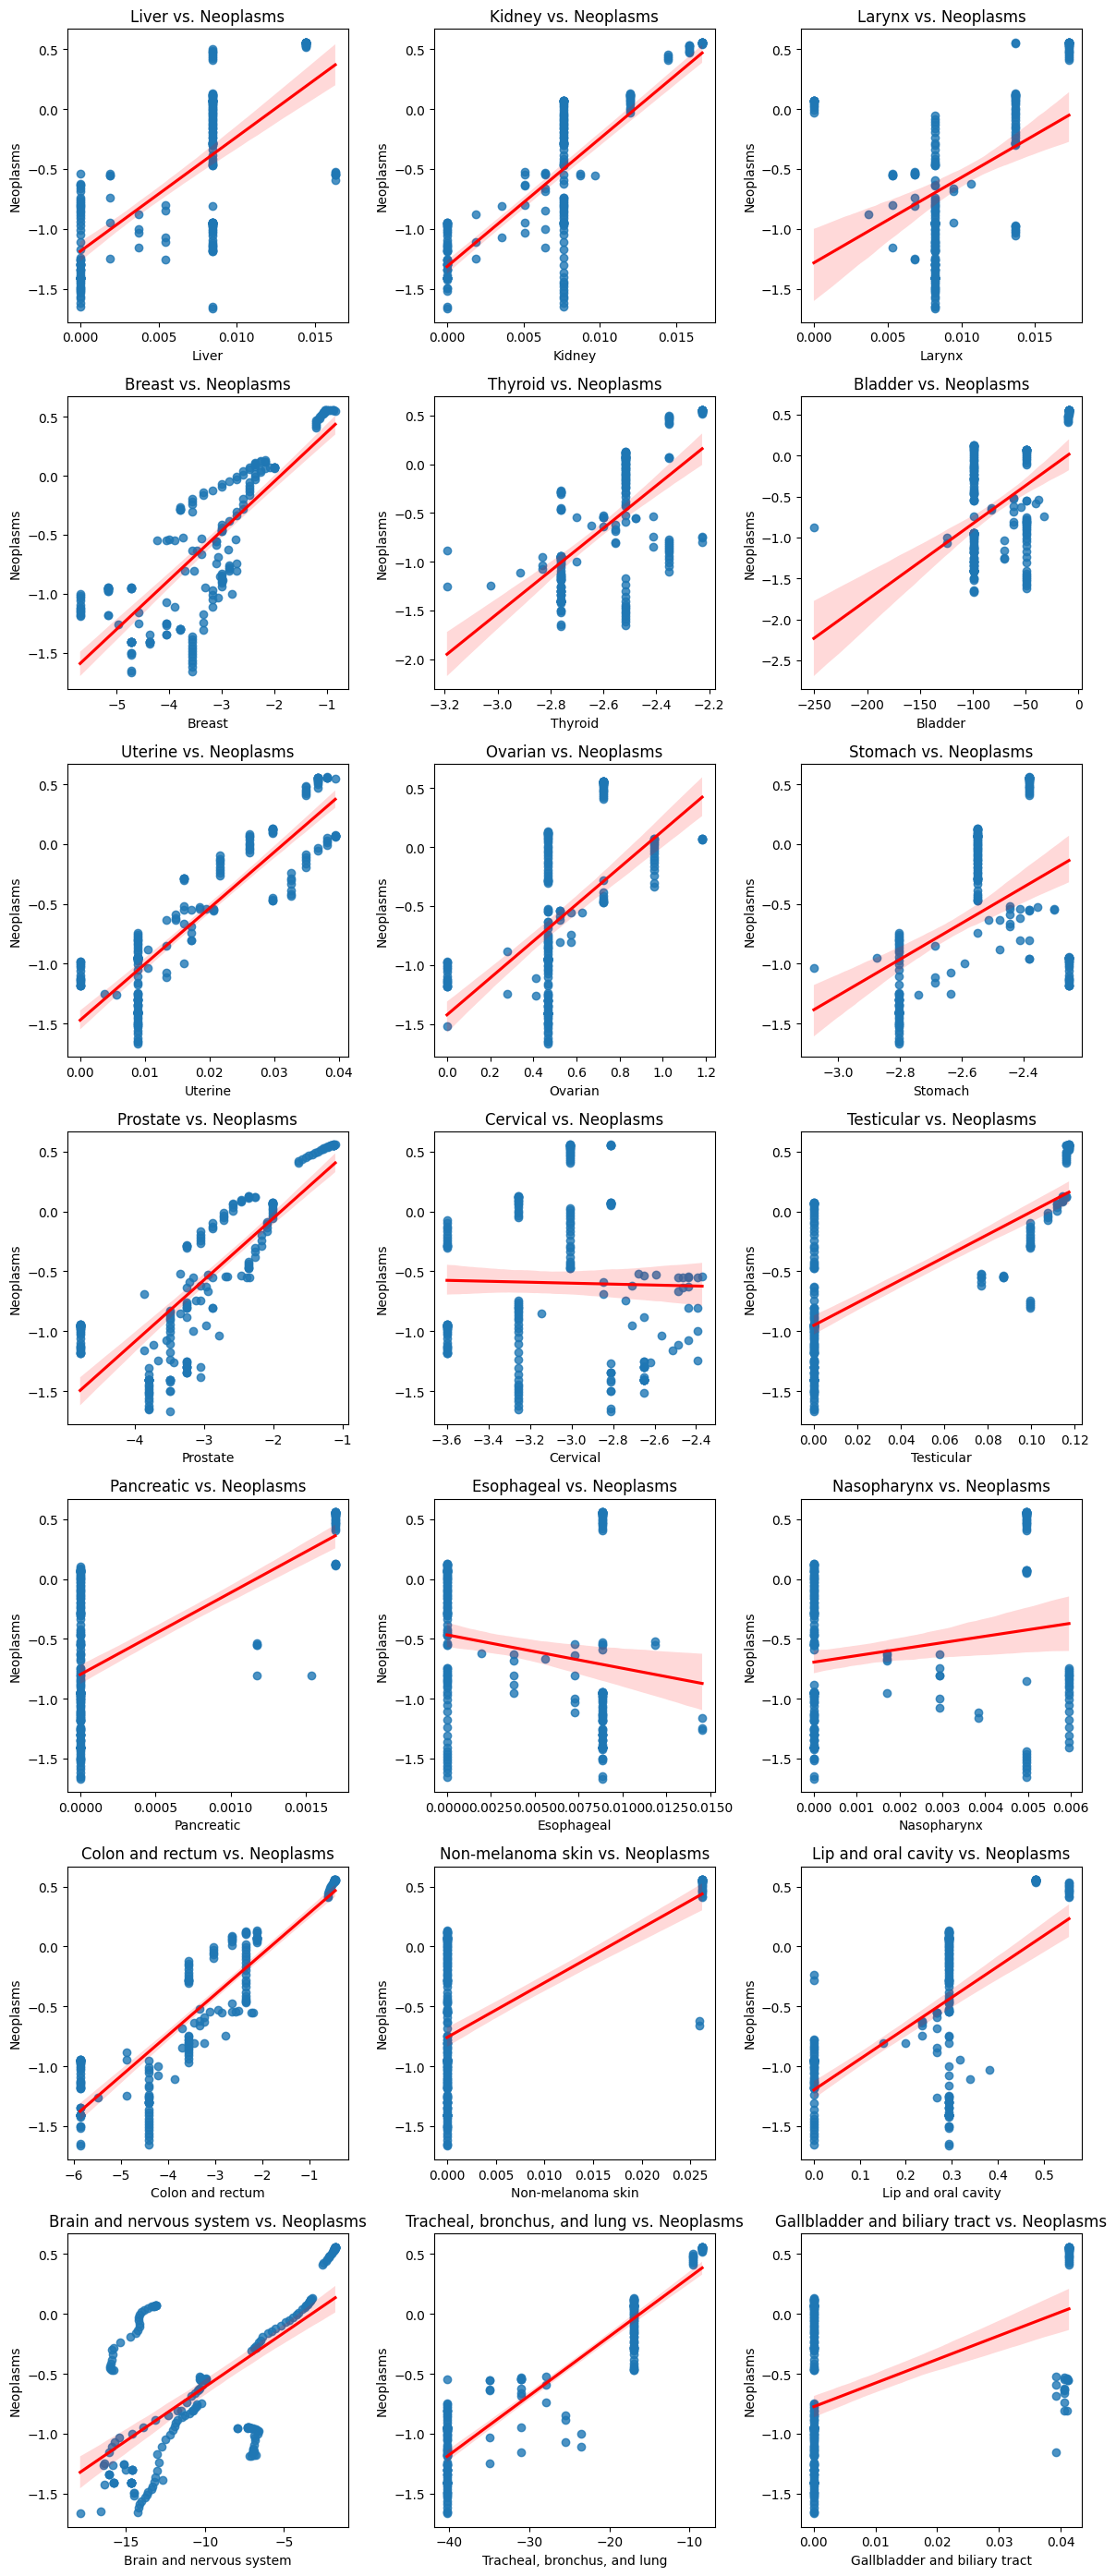

In [ ]:
#-------------------------------------------------------------------------------
# The scatter plots conclude linear fitting line
#-------------------------------------------------------------------------------

# Initialization the subplots
_, ax = plt.subplots(nrows=7, ncols=3, figsize=(12, 28))
ax = ax.ravel()

# Draw the scatter plots conclude linear fitting line
for index, column in enumerate(data_numeric.drop(columns=["Neoplasms"]).columns):
  sns.regplot(data, ax=ax[index], x=column, y="Neoplasms", line_kws={"color": "red"})
  ax[index].set_xlabel(column)
  ax[index].set_ylabel("Neoplasms")
  ax[index].set_title(column + " vs. Neoplasms")

# Do not blocked any title or label
plt.tight_layout()
plt.show()

From the above plots we have the following analysis.

- Increasing values for the following features are associated with the Neoplasms outcome:

  1. Breast
  2. Uterine
  3. Prostate
  4. Colon and rectum
  5. Brain and nervous system

- Decreasing values for the following features are associated with the Neoplasms outcome:
  - None

- The values for the following features are not associated with the Neoplasms outcome:

  1. Liver
  2. Kidney
  3. Larynx
  4. Thyroid
  5. Bladder
  6. Ovarian
  7. Stomach
  8. Cervical
  9. Testicular
  10. Pancreatic
  11. Esophageal
  12. Nasopharynx
  13. Non-melanoma skin
  14. Lip and oral cavity
  15. Tracheal, bronchus, and lung
  16. Gallbladder and biliary tract

---

### **2.5.2 - Hypothesis Testing** <span id="2.5.2"></span>

In terms of a P-value and a chosen significance level (alpha):
- If P-value <= alpha (usually 5%): significant result, reject null hypothesis (H0), dependent
- If P-value > alpha (usually 5%): not significant result, fail to reject null hypothesis (H0), independent

**Hypothesis Testing**

We seek to investigate whether there are significant differences in the prevalence of liver cancer and kidney cancer worldwide over the past 30 years.

To evaluate this, we formulated the following hypotheses:

- **Null (H0)**: There are no significant differences in the prevalence of liver cancer and kidney cancer across different regions worldwide.
- **Alternative (H1)**: There are significant differences in the prevalence of liver cancer and kidney cancer across different regions worldwide.

In [ ]:
# Get the data with type numeric
data_numeric = data.select_dtypes(include='number')

In [ ]:
# Split into two group by Rain Tomorrow 0 or 1
group_0 = data_numeric["Liver"]
group_1 = data_numeric["Kidney"]

# Calculate the T-test value and P-value by Welch"s t-test
data_t_test = scipy.stats.ttest_ind(group_0, group_1, equal_var=True)

print("T-test value: " + str(data_t_test[0]))
print("P-value: " + str(data_t_test[1]))

T-test value: -1.0771503729693153
P-value: 0.28205269389510274


The P-values is greater than 0.05 (5%), we do not reject the null hypothesis of the T-test and conclude that there is insignificant difference in the prevalence of liver cancer and kidney cancer across different countries over the past 30 years.

---
---

# **3. MODELING** <span id="3"></span>

---
---

**Preparing the Clustering Data**

In [ ]:
# Preparing the clustering data
data_clustering = data_numeric.drop(columns=["Neoplasms"], axis=1)

---

### **3.1 - Evaluation Metric** <span id="3.1"></span>

The following metrics are widely used in machine learning to evaluate clustering performance:

- **Davies Bouldin Score**
  - The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score
  - The minimum score is 0, with lower values indicating better clustering

- **Silhouette Score**
  - A metric to evaluate the quality of clustering is referred to as silhouette analysis. Silhouette analysis can be applied to other clustering algorithms as well. Silhouette coefficient ranges between −1 and 1, where a higher silhouette coefficient refers to a model with more coherent clusters
  - Score close to +1 means the sample is far away from the neighboring clusters. A value of 0 means that the sample is on or very close to the decision boundary between two neighboring clusters. Finally, negative values indicate that the samples could have potentially been assigned to the wrong cluster

- **Calinski Harabasz Score**
  - This is also known as the **Variance Ratio Criterion**, this measures the ratio of between-cluster variance and within-cluster variance. The higher the calinski-harabasz ratio, the more well-defined a cluster is

In [ ]:
# Setup the function to evaluate the clustering performance
def evaluation_clustering_model(clusters_num, acutal, predict):
  scores = pd.DataFrame( [ [ str(clusters_num),
                  davies_bouldin_score(acutal, predict),
                  silhouette_score(acutal, predict),
                  calinski_harabasz_score(acutal, predict) ] ],
               columns = [ "Clusters",
                       "Davies Bouldin Score",
                       "Silhouette Score",
                       "Calinski Harabasz Score" ] )
  return scores

clustering_model_scores = {}

---

### **3.2 - Centroid-Based Clustering** <span id="3.2"></span>

**Centroid-Based Clustering** is a type of clustering method that partitions or splits a data set into similar groups based on the distance between their centroids. Each cluster's centroid, or center, is either the mean or median of all the points in the cluster depending on the data.

One of the most commonly used centroid-based clustering techniques is:

- **K-Means**

---

#### **3.2.1 - K-Means** <span id="3.2.1"></span>

**K-Means** is a hard clustering approach, meaning each data point is assigned to a separate cluster and no probability associated with cluster membership.

- K-means assumes that the center of each cluster defines the cluster using a distance measure, mostly commonly Euclidean distance, to the centroid
- To initialize the clustering, we provide a number of expected clusters, which represents the 'K' in K-means, and the algorithm attempts to find reasonable clusters across the data to match that number
- The optimal k clusters in a given dataset is identified by iteratively minimizing the total distance between each point and its assigned cluster centroid
- K-means works well when the clusters are of roughly equivalent size, and there are not significant outliers or changes in density across the data.
- K-means often performs poorly when the data is high dimensional or when clusters have significantly different sizes or densities.
- K-means is also especially sensitive to outliers since it tries to establish centroids based on the mean values of all values in the cluster and thus is susceptible to overfitting to include those outliers.

**Hyperparameter**:
- **N Clusters**: The number of clusters to form as well as the number of centroids to generate.
- **Init**: `k-means++` means selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia, and it speeds up convergence; `random` means choose **N Clusters** observations at random from data for the initial centroids.
- **N Init**: Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. `auto` means number of runs depends on the value of **Init**. when `init='random'` then we have 10; when `init='k-means++'` then we have 1

In [ ]:
#-------------------------------------------------------------------------------
# Centroid-Based Clustering - K-Means
#-------------------------------------------------------------------------------

clustering_model_score = []

# We testing K from 2 to 10
for cluster in range(2, 11):
  model = KMeans(n_clusters=cluster, init='k-means++', n_init='auto')
  model.fit(data_clustering)
  clustering_model_score.append(evaluation_clustering_model(cluster, data_clustering, model.labels_))

**Display the Performance of Different Clusters**

In [ ]:
# Display the table of result
clustering_model_scores["K-Means"] = pd.concat(clustering_model_score)

clustering_model_scores["K-Means"].sort_values(by="Davies Bouldin Score", ascending=True)

,Clusters,Davies Bouldin Score,Silhouette Score,Calinski Harabasz Score
0,9,0.357643,0.757626,1843.756030
0,8,0.375306,0.740643,1537.783295
0,7,0.405525,0.692428,1182.452710
0,3,0.421777,0.710483,472.113904
0,6,0.428827,0.724954,855.256414
0,10,0.433904,0.754507,1854.997254
0,5,0.491501,0.697244,415.767724
0,4,0.502071,0.700640,465.780362
0,2,0.588264,0.652830,420.710941


---

### **3.3 - Hierarchical Clustering** <span id="3.3"></span>

**Hierarchical Clustering**, sometimes called connectivity-based clustering, groups data points together based on the proximity and connectivity of their attributes.

This method determines clusters based on how close data points are to one another across all of the dimensions. The idea is that objects that are nearer are more closely related than those that are far from each other.

Unlike k-means, there is no need to pre-specify the number of clusters. Instead, the clustering algorithm creates a graph network of the clusters at each hierarchical level. This network is hierarchical, meaning that any given node in it only has one parent node but may have multiple child nodes.

Hierarchical clusters can be graphed with a dendrogram to help visually summarize and organize discovered clusters and the hierarchy that they may contain.

There are two approaches to performing hierarchical cluster analysis:
- **Agglomerative**
- **Divisive**

---

#### **3.3.1 - Agglomerative** <span id="3.3.1"></span>

**Agglomerative Clustering** a bottom-up approach starts with individual data points and successively merges clusters by compute the proximity matrix of all the clusters at the current level of the hierarchy to create a tree-like structure. Once one level of clusters has been created where all the clusters have no or low inter-cluster similarity, the algorithm moves to the set of newly created clusters and repeats the process until there is one root node at the top of the hierarchical graph.

- In **Single-Linkage** clustering, the shortest distance between any pair of data points in two clusters is used as a similarity measure
- In **All-Pairs Linkage**, the average across all pairs of data points is used, whereas in sampled linkage, a sampling of the data points in the two clusters is used for calculating the average distance
- In **Centroid-Linkage**, the distance between the centroids is used

One challenge with agglomerative methods is that they can exhibit chaining, where larger clusters are naturally biased toward having closer distances to other points and so continue to get larger and larger and attract more data points into their cluster. Another disadvantage is that agglomerative methods may be much slower than divisive methods of constructing the hierarchy.

**Hyperparameter**:
- **N Clusters**: The number of clusters to form as well as the number of centroids to generate.
- **Linkage**: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. `ward` minimizes the variance of the clusters being merged; `average` uses the average of the distances of each observation of the two sets. `complete` linkage uses the maximum distances between all observations of the two sets; `single` uses the minimum of the distances between all observations of the two sets.

In [ ]:
#-------------------------------------------------------------------------------
# Hierarchical Clustering - Agglomerative
#-------------------------------------------------------------------------------

clustering_model_score = []

# We testing clusters from 2 to 10
for cluster in range(2, 11):
  model = AgglomerativeClustering(n_clusters=cluster, linkage='ward')
  model.fit(data_clustering)
  clustering_model_score.append(evaluation_clustering_model(cluster, data_clustering, model.labels_))

**Display the Performance of Different Clusters**

In [ ]:
# Display the table of result
clustering_model_scores["Agglomerative"] = pd.concat(clustering_model_score)

clustering_model_scores["Agglomerative"].sort_values(by="Davies Bouldin Score", ascending=True)

,Clusters,Davies Bouldin Score,Silhouette Score,Calinski Harabasz Score
0,9,0.319015,0.782969,1896.549964
0,5,0.327571,0.716101,882.356161
0,10,0.333955,0.773743,2330.407012
0,4,0.342759,0.709330,586.607371
0,8,0.346269,0.768805,1651.386286
0,6,0.347952,0.709507,1092.128352
0,7,0.378543,0.753489,1492.111088
0,3,0.438564,0.698432,458.676186
0,2,0.600630,0.638025,392.408289


---

#### **3.3.2 - Divisive** <span id="3.3.2"></span>

**Divisive Hierarchical Clustering** methods is a top-down approach successively partitions the data points into a tree-like structure. Divisive partitioning allows greater flexibility in terms of both the hierarchical structure of the tree and the level of balance in the different clusters. Divisive hierarchical clustering can be faster than agglomerative hierarchical clustering, especially when the data doesn't require constructing the tree all the way down to individual data points.

**Bisecting K-Means** is a kind of hierarchical clustering using a divisive approach. It build a random binary tree where each splitting (a node with two children) corresponds to splitting the points of dataset into 2 clusters using a flat-clustering method like K-Means. The clusters with the largest Sum of Squared Errors (SSE) are then partitioned further using a flat clustering method. The algorithm stops either when it reaches individual nodes or some minimum SSE.

**Hyperparameter**:
- **N Clusters**: The number of clusters to form as well as the number of centroids to generate
- **Init**: `k-means++` means selects initial cluster centers for k-mean clustering in a smart way to speed up convergence; `random` means choose **N Clusters** observations at random from data for the initial centroids
- **N Init**: Number of time the inner k-means algorithm will be run with different centroid seeds in each bisection

In [ ]:
#-------------------------------------------------------------------------------
# Hierarchical Clustering - Divisive - Bisecting K-Means
#-------------------------------------------------------------------------------

clustering_model_score = []

# We testing K from 2 to 10
for cluster in range(2, 11):
  model = BisectingKMeans(n_clusters=cluster, init='k-means++', n_init=1)
  model.fit(data_clustering)
  clustering_model_score.append(evaluation_clustering_model(cluster, data_clustering, model.labels_))

**Display the Performance of Different Clusters**

In [ ]:
# Display the table of result
clustering_model_scores["Divisive - Bisecting K-Means"] = pd.concat(clustering_model_score)

clustering_model_scores["Divisive - Bisecting K-Means"].sort_values(by="Davies Bouldin Score", ascending=True)

,Clusters,Davies Bouldin Score,Silhouette Score,Calinski Harabasz Score
0,9,0.327719,0.741308,1586.114776
0,6,0.352102,0.701951,1063.569787
0,5,0.362036,0.699513,872.457295
0,3,0.414133,0.701823,450.192239
0,8,0.417317,0.741552,1455.961632
0,10,0.491328,0.728800,1693.196015
0,7,0.521164,0.651643,1017.762416
0,4,0.528144,0.682457,445.173151
0,2,0.588264,0.652830,420.710941


---

### **3.4 - Distribution-Based Clustering** <span id="3.4"></span>

**Distribution-Based Clustering**, sometimes called probabilistic clustering, groups together data points based on their probability distribution. This approach assumes that there is a process generating normal distributions for each dimension of the data which create the cluster centers.

It's different from centroid-based clustering in that it doesn't use a distance metric like a Euclidean or Manhattan distance. Instead, distribution based approaches look for a well-defined distribution which appears across each dimension.

The cluster means are the means of the Gaussian distribution across each dimension. Distribution based clustering is a model-based approach to clustering because it requires fitting a distribution multiple times across each dimension to find clusters, which means that it can be computationally expensive when working with large data sets.

One commonly used approach to distribution-based clustering is:
- **Gaussian Mixture**

---

#### **3.4.1 - Gaussian Mixture** <span id="3.4.1"></span>

**Gaussian Mixture Model** is assumption that each cluster is defined by a normal distribution. Gaussian mixture operates on the principle that a complex, multi-modal distribution can be approximated by a combination of simpler Gaussian distributions, each representing a different cluster within the data. This is achieved through a process known as 'soft clustering', as opposed to 'hard clustering' methods like K-Means.

In soft clustering, instead of forcefully assigning a data point to a single cluster, gaussian mixture assigns probabilities that indicate the likelihood of that data point belonging to each of the Gaussian components. And the most powerful aspects of gaussian mixture is their capacity to compute the probability of each data point belonging to a particular cluster.

The essence of gaussian mixture lies in its ability to determine cluster characteristics such as mean, variance, and weight. Enables gaussian mixture to model the data with remarkable flexibility. By adjusting these parameters, a gaussian mixture can shape itself to fit a wide variety of data distributions, whether they are tightly clustered, widely dispersed, or overlapping with one another.
- The mean of each gaussian component give a central point, around which the data points are most densely clustered
- The variance provides insight into the spread or dispersion of the data points around this mean. A smaller variance indicates that the data points are closely clustered around the mean, while a larger variance suggests a more spread-out cluster
- The weights in a gaussian mixture are particularly significant. They represent the proportion of the dataset that belongs to each gaussian component.

**Hyperparameter**:
- **N Components**: The number of mixture components
- **Covariance Type**: String describing the type of covariance parameters to use. `full` means each component has its own general covariance matrix; `tied` means all components share the same general covariance matrix; `diag` means each component has its own diagonal covariance matrix; `spherical` means each component has its own single variance
- **Init Params**: The method used to initialize the weights, the means and the precisions. `kmeans` responsibilities are initialized using kmeans; `k-means++` use the k-means++ method to initialize; `random` responsibilities are initialized randomly; `random_from_data` initial means are randomly selected data points

In [ ]:
#-------------------------------------------------------------------------------
# Distribution-Based Clustering - Gaussian Mixture
#-------------------------------------------------------------------------------

clustering_model_score = []

# We testing K from 2 to 10
for cluster in range(2, 11):
  model = GaussianMixture(n_components=cluster, covariance_type='full', init_params='k-means++')
  model.fit(data_clustering)
  clustering_model_score.append(evaluation_clustering_model(cluster, data_clustering, model.predict(data_clustering)))

**Display the Performance of Different Clusters**

In [ ]:
# Display the table of result
clustering_model_scores["Gaussian Mixture"] = pd.concat(clustering_model_score)

clustering_model_scores["Gaussian Mixture"].sort_values(by="Davies Bouldin Score", ascending=True)

,Clusters,Davies Bouldin Score,Silhouette Score,Calinski Harabasz Score
0,9,0.317987,0.773603,1838.512348
0,5,0.331068,0.720288,967.514936
0,8,0.348381,0.768029,1658.830414
0,6,0.388041,0.708564,1162.827262
0,3,0.438564,0.698432,458.676186
0,10,0.459418,0.749034,1896.373459
0,7,0.465637,0.713569,1128.149042
0,4,0.502071,0.700640,465.780362
0,2,0.590217,0.650480,414.085265


---

### **3.5 - Density-Based Clustering** <span id="3.5"></span>

**Density-Based Clustering** works by detecting areas where points are concentrated and where they are separated by areas that are empty or sparse. Unlike centroid based approaches, like K-means, or distribution-based approaches, like Expectation Maximization, density-based clustering can detect clusters of an arbitrary shape. This can be extremely helpful when clusters aren't defined around a specific location or distribution.

Unlike other clustering algorithms, such as K-means and hierarchical clustering, a density-based algorithm can discover clusters of any shape, size, or density in your data. Density-based clustering also can distinguish between data points which are part of a cluster and those which should be labeled as noise. Density-based clustering is especially useful when working with datasets with noise or outliers or when we don't have prior knowledge about the number of clusters in the data.

One of clustering algorithms which takes a density-based approach to clustering:
- **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

---

#### **3.5.1 - DBSCAN** <span id="3.5.1"></span>

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** uses a density-based spatial clustering approach to create clusters with a density passed in by the user which centers around a spatial centroid. The area immediately around the centroid is referred to as a neighborhood and DBSCAN attempts to define neighborhoods of clusters that have the specified density. For each cluster, DBSCAN will define three types of data points:

- **Core Points**: A data point is a core point if the neighborhood around that data point contains at least as many points as the user specified minimum number of points.
- **Border Points**: A data point is a border point if the neighborhood around that data point contains less than the minimum number of data points but the neighborhood around that point contains a core point.
- **Outlier**: A data point is an outlier if it is neither a core point nor a border point. Essentially, this is the other class.

**Hyperparameter**:
- **Eps**: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
- **Min Samples**: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse

In [ ]:
#-------------------------------------------------------------------------------
# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
#-------------------------------------------------------------------------------

clustering_model_score = []

# We testing K from 2 to 10
for cluster in range(2, 11):
  model = DBSCAN(eps=0.1, min_samples=cluster)
  model.fit(data_clustering)
  clustering_model_score.append(evaluation_clustering_model(cluster, data_clustering, model.labels_))

**Display the Performance of Different Clusters**

In [ ]:
# Display the table of result
clustering_model_scores["DBSCAN"] = pd.concat(clustering_model_score)

clustering_model_scores["DBSCAN"].sort_values(by="Davies Bouldin Score", ascending=True)

,Clusters,Davies Bouldin Score,Silhouette Score,Calinski Harabasz Score
0,9,0.422893,0.396578,42.460410
0,10,0.422893,0.396578,42.460410
0,5,0.941488,-0.133882,21.119246
0,8,0.954702,-0.276675,23.745818
0,7,0.995497,-0.238643,17.730825
0,3,0.997801,-0.130864,13.266700
0,4,1.000265,-0.126813,15.886881
0,6,1.002452,-0.215033,21.620486
0,2,1.011354,0.051079,9.356127


---
---

# **4. SUMMARY** <span id="4"></span>

---
---

---

### **4.1 - Models Evaluation** <span id="4.1"></span>

We will now compare the prediction results of unsupervised model with various clustering algorithms on the data. The most suitable algorithm for the model will be selected based on metrics such as Davies Bouldin Score, Silhouette Score and Calinski Harabasz Score.

In [ ]:
# Split the metric values of train set and test set
model_scores = pd.concat( clustering_model_scores )

**Clustering Values Evaluation Based on the Davies Bouldin Score**

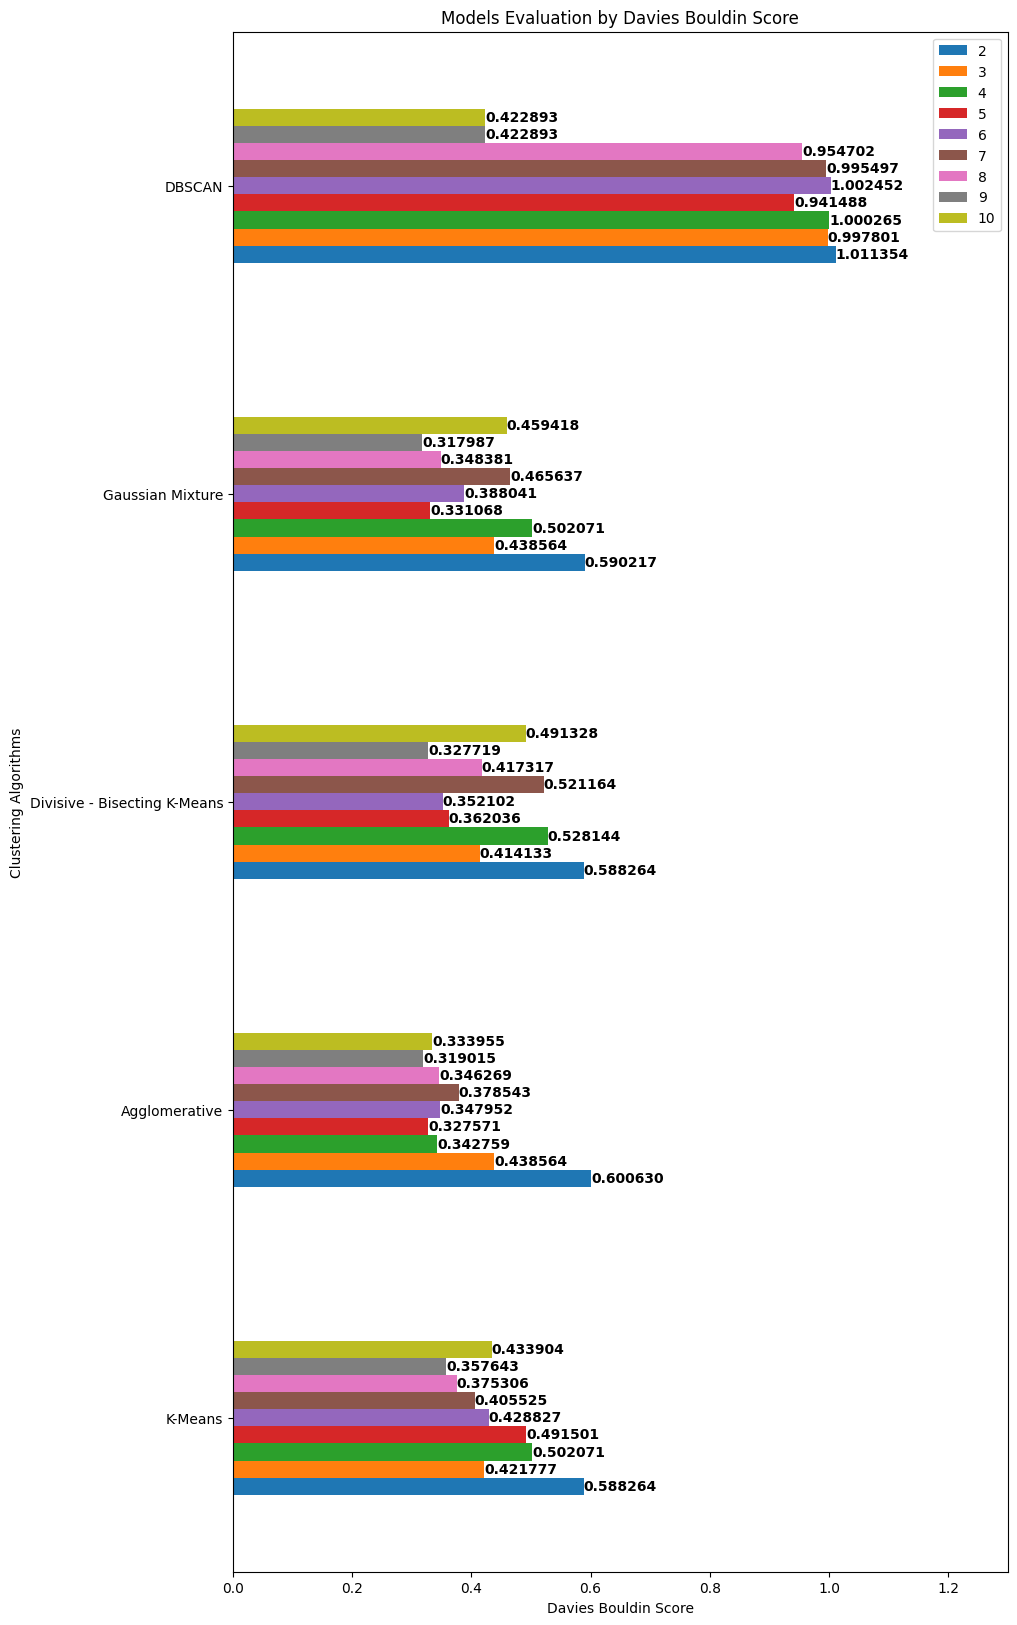

In [ ]:
model_scores_dbs_clusters = pd.DataFrame( { name : model_scores["Davies Bouldin Score"].loc[model_scores["Clusters"] == name].to_list() for name in model_scores["Clusters"].unique() },
                       index = [name for name, _ in model_scores.index.unique()] )


ax = model_scores_dbs_clusters.plot.barh( figsize = (10, 20),
                     xlabel = "Davies Bouldin Score",
                     ylabel = "Clustering Algorithms",
                     title = "Models Evaluation by Davies Bouldin Score",
                     xlim = [0.0, 1.3] )

for container in ax.containers:
  ax.bar_label(container, fmt='%.6f', fontweight='bold')

plt.show()

Based on the findings from section [**3. MODELING**](#3) and the accompanying plot, we determined that the optimal clustering value among the five algorithms tested is 9, as it consistently ranked first across all five algorithms.

**Models Evaluation Based on the Davies Bouldin Score with Cluster of 9**

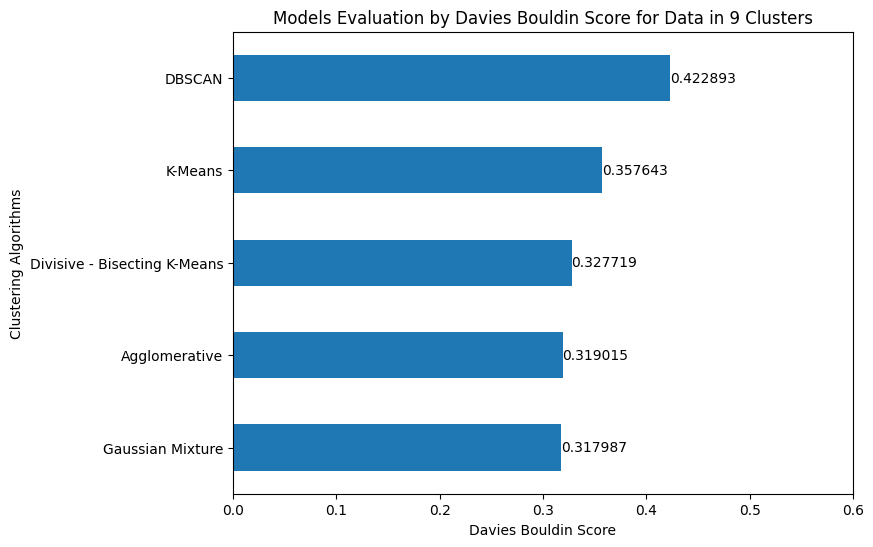

In [ ]:
model_scores_dbs_clusters_9 = model_scores_dbs_clusters['9'].sort_values(ascending=True)

ax = model_scores_dbs_clusters_9.plot.barh( figsize = (8, 6),
                        xlabel = "Davies Bouldin Score",
                        ylabel = "Clustering Algorithms",
                        title = "Models Evaluation by Davies Bouldin Score for Data in 9 Clusters",
                        xlim = [0.0, 0.6] )

for container in ax.containers:
  ax.bar_label(container, fmt='%.6f')

plt.show()

From the figure above, it is evident that the performance of agglomerative clustering and Gaussian mixture models is very similar, with the Gaussian mixture model performing slightly better. Therefore, we have selected the Gaussian mixture model with the optimal clustering value of 9 as our final unsupervised model.

**Visualize the Clustering Performance of the Final Model**

In [ ]:
# Get the model on the cluster we selected
model = GaussianMixture(n_components=9, covariance_type='full', init_params='k-means++')
model.fit(data_clustering)

# Labelled data using the final clustering model
data["Cluster"] = model.predict(data_clustering)

# Loading world counties map
with open('/content/countries.geo.json') as json_file:
  file_contents = json_file.read()
world_counties_map = json.loads(file_contents)

# Draw the world counties map
fig = px.choropleth( data,
            geojson = world_counties_map,
            locations = "Code",
            color = "Cluster",
            color_continuous_scale = "spectral",
            range_color = (0, 8),
            hover_data = ["Country"] )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

---

### **4.2 - Summary** <span id="4.2"></span>

Based on the analysis in the preceding sections, the most suitable model for our project is the **Gaussian Mixture** model, utilizing distribution-based clustering with 9 clusters.

Although the Gaussian mixture clustering algorithm, which calculates data probabilities within Gaussian components, outperformed the other four algorithms, its complexity presents a challenge. With 20 features, visually representing how the Gaussian model clusters the data becomes difficult, which is a significant drawback. In contrast, algorithms like K-Means, which offer easier comparability, could enhance post-clustering analysis.

<br/>

In the future, we should incorporate Principal Components Analysis (PCA) to facilitate kernel-based clustering evaluations, which may yield improved performance.

---
---

# **5. REFERENCES** <span id="5"></span>

---
---


| Sources | Article | Author |
| :--- | :--- | :--- |
| Book | [Practitioner's Guide to Data Science](https://scientistcafe.com/ids/) | Hui Lin & Ming Li |
| Book | [Machine Learning Guide for Oil and Gas Using Python](https://www.sciencedirect.com/book/9780128219294/machine-learning-guide-for-oil-and-gas-using-python) | Hoss Belyadi & Alireza Haghighat |
| Publication | [A Comparison of Document Clustering Techniques](https://www.stat.cmu.edu/~rnugent/PCMI2016/papers/DocClusterComparison.pdf) | Michael Steinbach |
| Kaggle | [Cancer and Deaths Dataset : 1990 to 2019 Globally](https://www.kaggle.com/datasets/belayethossainds/cancer-and-deaths-dataset-19902019-globally/data) | Belayet Hossain |
| Kaggle | [PowerTransformers In-Depth Understanding(Box -Cox & Yeo Johnson)](https://www.kaggle.com/discussions/getting-started/330474) | Abhishek Kukreja |
| IBM | [What is unsupervised learning?](https://www.ibm.com/topics/unsupervised-learning) | IBM Team |
| IBM | [What is clustering?](https://www.ibm.com/topics/clustering) | IBM Team |
| Medium | [How to Remove Outliers for Machine Learning?](https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8) | Anuganti Suresh |
| Medium | [Categorical Data Encoding Techniques](https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f) | Krishnakanth Jarapala |
| Medium | [Correlation in machine learning -  All you need to know](https://medium.com/@abdallahashraf90x/all-you-need-to-know-about-correlation-for-machine-learning-e249fec292e9) | Abdallah Ashraf |
| Medium | [When to Use Mean, Median, and Mode for Imputing Missing Values](https://medium.com/@chandrikasai9997/imputing-missing-values-is-another-technique-used-to-handle-missing-data-in-a-dataset-824957ce71b4) | Chandrikasai |
| Medium | [Handling Missing Data with KNN Imputer](https://medium.com/@bhanupsingh484/handling-missing-data-with-knn-imputer-927d49b09015) | Bhanupsingh |
| Medium | [Multivariate Imputation by Chained-Equations (MICE)](https://medium.com/@kunalshrm175/multivariate-imputation-by-chained-equations-mice-2d3efb063434) | Kunal |
| Medium | [Hypothesis Testing with Python: T-Test, Z-Test, and P-Values](https://medium.com/@codewithpj/hypothesis-testing-with-python-t-test-z-test-and-p-values-code-examples-fa274dc58c36) | Praise James |
| Medium | [Five Methods for Data Splitting in Machine Learning](https://medium.com/@tubelwj/five-methods-for-data-splitting-in-machine-learning-27baa50908ed) | Gen. David |
| Medium | [Understanding Gaussian Mixture Models: A Comprehensive Guide](https://medium.com/@juanc.olamendy/understanding-gaussian-mixture-models-a-comprehensive-guide-df30af59ced7) | Juan Olamendy |
| GeeksforGeeks | [Univariate, Bivariate and Multivariate data and its analysis](https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/) | Aaradhana Thapliyal |
| Scribbr | [Correlation Coefficient - Types, Formulas & Examples](https://www.scribbr.com/statistics/correlation-coefficient/) | Pritha Bhandari |
| TurinTech AI | [Data Quality in Machine Learning: How to Evaluate and Improve?](https://www.turintech.ai/data-quality-in-machine-learning-how-to-evaluate-and-improve/) | Chrystalla Pavlou |
| Tableau | [Guide To Data Cleaning: Definition, Benefits, Components, And How To Clean Your Data](https://www.tableau.com/learn/articles/what-is-data-cleaning#:~:text=tools%20and%20software-,What%20is%20data%20cleaning%3F,to%20be%20duplicated%20or%20mislabeled) | Tableau Team |
| GitHub | [world.geo.json](https://github.com/johan/world.geo.json/tree/master) | Johan Sundström |
| Plotly | [Choropleth Maps in Python](https://plotly.com/python/choropleth-maps/) | Plotly Team |